<a href="https://colab.research.google.com/github/skosch/YinYangFit/blob/master/YinYangFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lasciate ogne speranza, voi ch'intrate**

This is a research scratchpad; it's not designed to be read but rather evolved to test ideas. Please reach out if you'd like a guided tour. 



## Setup

In [59]:
import itertools
import os

#import numpy as np

#import torch as T
#import torch.nn.functional as F
import random; random.seed()
import math
#import pickle
#import os
from tqdm import tqdm as tqdm
#import sys
#from functools import reduce
#import random
from itertools import cycle, islice, product
import operator
from functools import lru_cache
from scipy.linalg import toeplitz
from scipy.optimize import minimize_scalar
from scipy.ndimage import rotate, distance_transform_edt
from google.colab import output
#!pip install torchdiffeq
!pip install --quiet tensorfont
#!pip install --quiet fonttools
#!pip install --quiet --upgrade fontParts
#!pip install booleanOperations
#!pip install --quiet --upgrade ufo-extractor
#!pip install --quiet --upgrade defcon
#!pip install --quiet --upgrade ufo2ft
#!pip install --quiet --upgrade anisotropic-distance-transform
#import fontParts
#import extractor
#import defcon
#from torchdiffeq import odeint_adjoint as odeint
#import adt
#from ufo2ft import compileOTF


!pip install --quiet nptyping
from nptyping import NDArray, Float, Shape, Complex
from tensorfont import Font
import jax
import jax.numpy as jnp
import jax.nn as nn
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import matplotlib.cm
from matplotlib.colors import ListedColormap, hsv_to_rgb, rgb_to_hsv
turbo_colormap_data = [[0.18995,0.07176,0.23217],[0.19483,0.08339,0.26149],[0.19956,0.09498,0.29024],[0.20415,0.10652,0.31844],[0.20860,0.11802,0.34607],[0.21291,0.12947,0.37314],[0.21708,0.14087,0.39964],[0.22111,0.15223,0.42558],[0.22500,0.16354,0.45096],[0.22875,0.17481,0.47578],[0.23236,0.18603,0.50004],[0.23582,0.19720,0.52373],[0.23915,0.20833,0.54686],[0.24234,0.21941,0.56942],[0.24539,0.23044,0.59142],[0.24830,0.24143,0.61286],[0.25107,0.25237,0.63374],[0.25369,0.26327,0.65406],[0.25618,0.27412,0.67381],[0.25853,0.28492,0.69300],[0.26074,0.29568,0.71162],[0.26280,0.30639,0.72968],[0.26473,0.31706,0.74718],[0.26652,0.32768,0.76412],[0.26816,0.33825,0.78050],[0.26967,0.34878,0.79631],[0.27103,0.35926,0.81156],[0.27226,0.36970,0.82624],[0.27334,0.38008,0.84037],[0.27429,0.39043,0.85393],[0.27509,0.40072,0.86692],[0.27576,0.41097,0.87936],[0.27628,0.42118,0.89123],[0.27667,0.43134,0.90254],[0.27691,0.44145,0.91328],[0.27701,0.45152,0.92347],[0.27698,0.46153,0.93309],[0.27680,0.47151,0.94214],[0.27648,0.48144,0.95064],[0.27603,0.49132,0.95857],[0.27543,0.50115,0.96594],[0.27469,0.51094,0.97275],[0.27381,0.52069,0.97899],[0.27273,0.53040,0.98461],[0.27106,0.54015,0.98930],[0.26878,0.54995,0.99303],[0.26592,0.55979,0.99583],[0.26252,0.56967,0.99773],[0.25862,0.57958,0.99876],[0.25425,0.58950,0.99896],[0.24946,0.59943,0.99835],[0.24427,0.60937,0.99697],[0.23874,0.61931,0.99485],[0.23288,0.62923,0.99202],[0.22676,0.63913,0.98851],[0.22039,0.64901,0.98436],[0.21382,0.65886,0.97959],[0.20708,0.66866,0.97423],[0.20021,0.67842,0.96833],[0.19326,0.68812,0.96190],[0.18625,0.69775,0.95498],[0.17923,0.70732,0.94761],[0.17223,0.71680,0.93981],[0.16529,0.72620,0.93161],[0.15844,0.73551,0.92305],[0.15173,0.74472,0.91416],[0.14519,0.75381,0.90496],[0.13886,0.76279,0.89550],[0.13278,0.77165,0.88580],[0.12698,0.78037,0.87590],[0.12151,0.78896,0.86581],[0.11639,0.79740,0.85559],[0.11167,0.80569,0.84525],[0.10738,0.81381,0.83484],[0.10357,0.82177,0.82437],[0.10026,0.82955,0.81389],[0.09750,0.83714,0.80342],[0.09532,0.84455,0.79299],[0.09377,0.85175,0.78264],[0.09287,0.85875,0.77240],[0.09267,0.86554,0.76230],[0.09320,0.87211,0.75237],[0.09451,0.87844,0.74265],[0.09662,0.88454,0.73316],[0.09958,0.89040,0.72393],[0.10342,0.89600,0.71500],[0.10815,0.90142,0.70599],[0.11374,0.90673,0.69651],[0.12014,0.91193,0.68660],[0.12733,0.91701,0.67627],[0.13526,0.92197,0.66556],[0.14391,0.92680,0.65448],[0.15323,0.93151,0.64308],[0.16319,0.93609,0.63137],[0.17377,0.94053,0.61938],[0.18491,0.94484,0.60713],[0.19659,0.94901,0.59466],[0.20877,0.95304,0.58199],[0.22142,0.95692,0.56914],[0.23449,0.96065,0.55614],[0.24797,0.96423,0.54303],[0.26180,0.96765,0.52981],[0.27597,0.97092,0.51653],[0.29042,0.97403,0.50321],[0.30513,0.97697,0.48987],[0.32006,0.97974,0.47654],[0.33517,0.98234,0.46325],[0.35043,0.98477,0.45002],[0.36581,0.98702,0.43688],[0.38127,0.98909,0.42386],[0.39678,0.99098,0.41098],[0.41229,0.99268,0.39826],[0.42778,0.99419,0.38575],[0.44321,0.99551,0.37345],[0.45854,0.99663,0.36140],[0.47375,0.99755,0.34963],[0.48879,0.99828,0.33816],[0.50362,0.99879,0.32701],[0.51822,0.99910,0.31622],[0.53255,0.99919,0.30581],[0.54658,0.99907,0.29581],[0.56026,0.99873,0.28623],[0.57357,0.99817,0.27712],[0.58646,0.99739,0.26849],[0.59891,0.99638,0.26038],[0.61088,0.99514,0.25280],[0.62233,0.99366,0.24579],[0.63323,0.99195,0.23937],[0.64362,0.98999,0.23356],[0.65394,0.98775,0.22835],[0.66428,0.98524,0.22370],[0.67462,0.98246,0.21960],[0.68494,0.97941,0.21602],[0.69525,0.97610,0.21294],[0.70553,0.97255,0.21032],[0.71577,0.96875,0.20815],[0.72596,0.96470,0.20640],[0.73610,0.96043,0.20504],[0.74617,0.95593,0.20406],[0.75617,0.95121,0.20343],[0.76608,0.94627,0.20311],[0.77591,0.94113,0.20310],[0.78563,0.93579,0.20336],[0.79524,0.93025,0.20386],[0.80473,0.92452,0.20459],[0.81410,0.91861,0.20552],[0.82333,0.91253,0.20663],[0.83241,0.90627,0.20788],[0.84133,0.89986,0.20926],[0.85010,0.89328,0.21074],[0.85868,0.88655,0.21230],[0.86709,0.87968,0.21391],[0.87530,0.87267,0.21555],[0.88331,0.86553,0.21719],[0.89112,0.85826,0.21880],[0.89870,0.85087,0.22038],[0.90605,0.84337,0.22188],[0.91317,0.83576,0.22328],[0.92004,0.82806,0.22456],[0.92666,0.82025,0.22570],[0.93301,0.81236,0.22667],[0.93909,0.80439,0.22744],[0.94489,0.79634,0.22800],[0.95039,0.78823,0.22831],[0.95560,0.78005,0.22836],[0.96049,0.77181,0.22811],[0.96507,0.76352,0.22754],[0.96931,0.75519,0.22663],[0.97323,0.74682,0.22536],[0.97679,0.73842,0.22369],[0.98000,0.73000,0.22161],[0.98289,0.72140,0.21918],[0.98549,0.71250,0.21650],[0.98781,0.70330,0.21358],[0.98986,0.69382,0.21043],[0.99163,0.68408,0.20706],[0.99314,0.67408,0.20348],[0.99438,0.66386,0.19971],[0.99535,0.65341,0.19577],[0.99607,0.64277,0.19165],[0.99654,0.63193,0.18738],[0.99675,0.62093,0.18297],[0.99672,0.60977,0.17842],[0.99644,0.59846,0.17376],[0.99593,0.58703,0.16899],[0.99517,0.57549,0.16412],[0.99419,0.56386,0.15918],[0.99297,0.55214,0.15417],[0.99153,0.54036,0.14910],[0.98987,0.52854,0.14398],[0.98799,0.51667,0.13883],[0.98590,0.50479,0.13367],[0.98360,0.49291,0.12849],[0.98108,0.48104,0.12332],[0.97837,0.46920,0.11817],[0.97545,0.45740,0.11305],[0.97234,0.44565,0.10797],[0.96904,0.43399,0.10294],[0.96555,0.42241,0.09798],[0.96187,0.41093,0.09310],[0.95801,0.39958,0.08831],[0.95398,0.38836,0.08362],[0.94977,0.37729,0.07905],[0.94538,0.36638,0.07461],[0.94084,0.35566,0.07031],[0.93612,0.34513,0.06616],[0.93125,0.33482,0.06218],[0.92623,0.32473,0.05837],[0.92105,0.31489,0.05475],[0.91572,0.30530,0.05134],[0.91024,0.29599,0.04814],[0.90463,0.28696,0.04516],[0.89888,0.27824,0.04243],[0.89298,0.26981,0.03993],[0.88691,0.26152,0.03753],[0.88066,0.25334,0.03521],[0.87422,0.24526,0.03297],[0.86760,0.23730,0.03082],[0.86079,0.22945,0.02875],[0.85380,0.22170,0.02677],[0.84662,0.21407,0.02487],[0.83926,0.20654,0.02305],[0.83172,0.19912,0.02131],[0.82399,0.19182,0.01966],[0.81608,0.18462,0.01809],[0.80799,0.17753,0.01660],[0.79971,0.17055,0.01520],[0.79125,0.16368,0.01387],[0.78260,0.15693,0.01264],[0.77377,0.15028,0.01148],[0.76476,0.14374,0.01041],[0.75556,0.13731,0.00942],[0.74617,0.13098,0.00851],[0.73661,0.12477,0.00769],[0.72686,0.11867,0.00695],[0.71692,0.11268,0.00629],[0.70680,0.10680,0.00571],[0.69650,0.10102,0.00522],[0.68602,0.09536,0.00481],[0.67535,0.08980,0.00449],[0.66449,0.08436,0.00424],[0.65345,0.07902,0.00408],[0.64223,0.07380,0.00401],[0.63082,0.06868,0.00401],[0.61923,0.06367,0.00410],[0.60746,0.05878,0.00427],[0.59550,0.05399,0.00453],[0.58336,0.04931,0.00486],[0.57103,0.04474,0.00529],[0.55852,0.04028,0.00579],[0.54583,0.03593,0.00638],[0.53295,0.03169,0.00705],[0.51989,0.02756,0.00780],[0.50664,0.02354,0.00863],[0.49321,0.01963,0.00955],[0.47960,0.01583,0.01055]]
matplotlib.cm.register_cmap('turbo', cmap=ListedColormap(turbo_colormap_data))

dark_turbo_colormap_data = []
for tc in turbo_colormap_data:
    tc_hsv = rgb_to_hsv(tc)
    tc_hsv[2] *= .5
    dark_turbo_colormap_data.append(hsv_to_rgb(tc_hsv))
matplotlib.cm.register_cmap('darkturbo', cmap=ListedColormap(dark_turbo_colormap_data))

#dev = T.device('cuda' if T.cuda.is_available() else 'cpu')
#print("✓ Dependencies imported.")

In [60]:
#!wget -q -O OpenSans-Regular.ttf https://github.com/googlefonts/opensans/blob/master/ttfs/OpenSans-Regular.ttf?raw=true
#!wget -q -O Roboto.ttf https://github.com/google/fonts/blob/master/apache/roboto/Roboto-Regular.ttf?raw=true
#!wget -q -O Roboto.otf https://github.com/AllThingsSmitty/fonts/blob/master/Roboto/Roboto-Regular/Roboto-Regular.otf?raw=true
#!wget -q -O DroidSerif.ttf https://github.com/datactivist/sudweb/blob/master/fonts/droid-serif-v6-latin-regular.ttf?raw=true
!wget -q -O CrimsonItalic.otf https://github.com/skosch/Crimson/blob/master/Desktop%20Fonts/OTF/Crimson-Italic.otf?raw=true
#!wget -q -O CrimsonBold.otf https://github.com/skosch/Crimson/blob/master/Desktop%20Fonts/OTF/Crimson-Bold.otf?raw=true 
#!wget -q -O CrimsonRoman.otf https://github.com/alif-type/amiri/blob/master/Amiri-Regular.ttf?raw=true

!wget -q -O CrimsonRoman.otf https://github.com/skosch/Crimson/blob/master/Desktop%20Fonts/OTF/Crimson-Roman.otf?raw=true
print("✓ Font file(s) downloaded.")

✓ Font file(s) downloaded.


In [61]:
glyph_char_list = "abcdefghijklmnopqrstuvwxyzUTO"
#glyph_char_list = "bdghijlmxnopqu" # straight letters only
#glyph_char_list = "abgjqrstxc"
#glyph_char_list = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
#glyph_char_list = "OO"
#glyph_char_list = "axcy"

# ==== Create Font ====
factor = 1.0 #1.539  # This scales the size of everything
filename = "CrimsonRoman.otf"
f = Font(filename, 34 * factor) # Roboto.ttf CrimsonRoman.otf # 34 for lowercase
x_height = f.get_xheight()
print(x_height)
box_height = int(f.full_height_px)
box_width = int(161 * factor) # 121
box_width += (box_width + 1) % 2
print("Box size:", box_height, "×", box_width)

batch_size = 1
sample_distance_deltas = [-3, -1, 0, 1, 5]
sample_distance_factors = [.8, 1., 2.0]
n_sample_distances = len(sample_distance_deltas)

n_v1_scales = 6
n_b_scales = 1
n_v1_orientations = 8
n2_v1_orientations = 2 * n_v1_orientations
n_v4_scales = 8
n_g_scales = n_v1_scales

# ==== Load glyph images ====

def get_glyph_image(glyph_char):
    """Returns a np.array of shape [box_height, box_width] containing the glyph at the center."""
    return f.glyph(glyph_char).as_matrix(normalize=True).with_padding_to_constant_box_width(box_width).astype(np.float32)

def get_glyph_ink_width(glyph_char):
    """Returns the width of the rendered glyph in pixels."""
    return f.glyph(glyph_char).ink_width

glyph_images = {c: get_glyph_image(c) for c in tqdm(glyph_char_list)}
print("  ✓", len(glyph_char_list), "glyphs rendered.", flush=True)
glyph_ink_widths = {c: get_glyph_ink_width(c) for c in tqdm(glyph_char_list)}
print("  ✓", len(glyph_char_list), "glyphs measured.", flush=True)

34
Box size: 80 × 161


100%|██████████| 29/29 [00:00<00:00, 719.23it/s]

  ✓ 29 glyphs rendered.



100%|██████████| 29/29 [00:00<00:00, 166167.78it/s]

  ✓ 29 glyphs measured.


rbarsum -0.14226785 0.00080353953 iedgesum -0.0034448039 0.004211058
rbarsum -0.123522505 0.0008030975 iedgesum -0.0028485004 0.0042031235
rbarsum 0.051308706 0.0020240366 iedgesum -0.004520975 0.0105027305
rbarsum 0.045501046 0.0020216617 iedgesum -0.0038448013 0.010396777
rbarsum 0.04808274 0.005056053 iedgesum -0.001685746 0.026296394
rbarsum 0.041848674 0.005066376 iedgesum -0.0014396869 0.025265882
rbarsum 0.0122458935 0.013197805 iedgesum -6.5505505e-05 0.06604868
rbarsum 0.010579877 0.012869405 iedgesum -5.6535006e-05 0.06304343
rbarsum 0.0004274249 0.039323527 iedgesum 2.5391579e-05 0.15283717
rbarsum 0.00037136674 0.03951407 iedgesum 2.1606684e-05 0.14310732
rbarsum -0.00030606985 0.11034576 iedgesum -0.00027763844 0.27168328
rbarsum -0.00022727251 0.09373864 iedgesum -0.00023686886 0.2554546


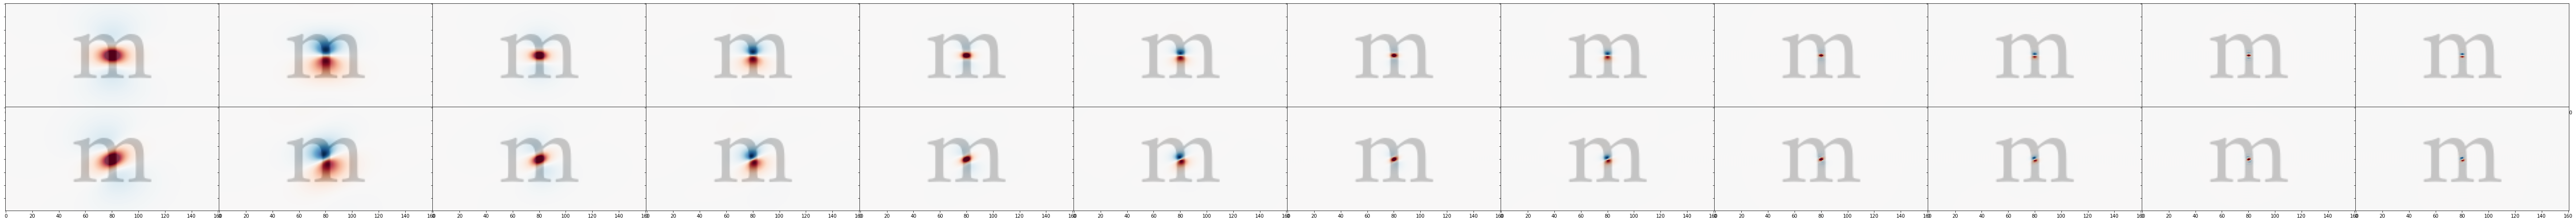

In [62]:
def unit_pgrid(keep_aspect_ratio=False):  # polar grid
    """Generate a meshgrid and rotate it by RotRad radians."""
    y, x = jnp.meshgrid(jnp.arange(-box_height, box_height, dtype=jnp.float32),
                      jnp.arange(-box_width, box_width, dtype=jnp.float32), indexing="ij") 
    y = y / box_height
    x = x / (box_width if keep_aspect_ratio else box_height)
    r = jnp.sqrt(x**2 + y**2)
    angle = jnp.arctan2(x, y)
    angle = jnp.where(angle<0 , 2*jnp.pi+angle, angle)
    return r, angle

max_period = 30
min_period = 3
# we always want to have divided by a constant

def get_sigmas():
    sigmas = []
    factor = (min_period / max_period) ** (1 / (n_v1_scales - 1))
    for s in range(n_v1_scales):
        sigmas.append(max_period * factor ** s)
    return jnp.array(sigmas)

calc_time = 0
render_time = 0


def get_loggabor_filter_bank(filter_length, display_filters=False, display_fft=False):
    r, angle = unit_pgrid(True)
    unit_freqs = r.at[box_height, box_width].set(1.)
    lowpassfilter = 1.0 / (1.0 + (unit_freqs / 0.9)**20)

    if False:
        print("We cut off the frequencies in the corners to get a smoother filter, using this mask:")
        plt.imshow(lowpassfilter)
        plt.colorbar()
        plt.show()

    bandwidth = 0.75

    @jax.jit
    def get_filter_log_gabor(s, theta):
        target_period = s
        freq_ring = (jnp.exp(-(jnp.log(unit_freqs * target_period))**2) / (2 * np.log(bandwidth)**2)).at[box_height, box_width].set(0)
        #freq_ring[box_height, box_width] = 0

        # Remove the corners of the FFT by passing through a large circle with round edges
        freq_ring *= lowpassfilter

        # Now for the angular filter, we can use a von Mises function. We only want this to go around one side, only on the positive real.
        k = filter_length 
        angular_filter = jnp.exp(k * jnp.cos(angle - theta*jnp.pi/n_v1_orientations)) / (2*jnp.pi*jnp.i0(k))

        real_filter = freq_ring * angular_filter

        # We want the same energy in every filter. How do we achieve this? We want to take the area that it covers in the FFT and make the max equal to one.
        return jnp.fft.ifftshift(-real_filter + 0j)


    sigmas = get_sigmas()

    def generate_filter_bank():
        filter_bank = jnp.zeros((n_v1_scales, n_v1_orientations, 2*box_height, 2*box_width), dtype=jnp.complex64)
        for s in range(n_v1_scales):
            sigma = sigmas[s]
            for o in range(n_v1_orientations):
                f = get_filter_log_gabor(sigma, o)
                filter_bank = filter_bank.at[s, o, :, :].set(f)
        return filter_bank

    @jax.jit
    def comp_fft_max(f):
        return jnp.max(jnp.abs(jnp.imag(jnp.fft.ifft2(f))))

    @jax.jit
    def comp_ifft_f(f):
        return (jnp.fft.fftshift(jnp.fft.ifft2(f)))[int(np.ceil(box_height / 2)):int(box_height + np.ceil(box_height / 2)),
                                        int(np.ceil(box_width / 2)):int(box_width + np.ceil(box_width / 2))]

    def render_filter_bank(filter_bank):
        if display_filters:
            sizediv = 20 
            #fig, ax = plt.subplots(nrows=n_v1_scales*2, ncols=n_v1_orientations, gridspec_kw = {'wspace':0, 'hspace':0}, figsize=(box_width * n_v1_orientations / sizediv, box_height * n_v1_scales * 2 / sizediv))
            fig, ax = plt.subplots(nrows=2, ncols=2*n_v1_scales, gridspec_kw = {'wspace':0, 'hspace':0},
                                   figsize=(2*box_width*n_v1_scales / sizediv, 2*box_height / sizediv))

        totalfilter = 0
        for s in range(n_v1_scales):
            sigma = sigmas[s]
            for o in range(n_v1_orientations):
                f = filter_bank[s, o, :, :]
                if display_filters and o <= 1:
                    mx = comp_fft_max(f)
                    ifft_f = comp_ifft_f(f)
                    ifft_f_r = jnp.real(ifft_f)
                    ifft_f_i = jnp.imag(ifft_f)
                    print("rbarsum", jnp.sum(ifft_f_r), jnp.max(ifft_f_r), "iedgesum", jnp.sum(ifft_f_i), jnp.max(ifft_f_i))
                    ax[o, 2*s+0].imshow(ifft_f_r, cmap="RdBu", vmin=-mx, vmax=mx)
                    ax[o, 2*s+0].imshow(1-glyph_images["m"], cmap="gray", alpha=0.2)
                    ax[o, 2*s+0].set_aspect("auto")
                    ax[o, 2*s+0].set_yticklabels([])
                    ax[o, 2*s+1].imshow(ifft_f_i, cmap="RdBu", vmin=-mx, vmax=mx)
                    ax[o, 2*s+1].imshow(1-glyph_images["m"], cmap="gray", alpha=0.2)
                    ax[o, 2*s+1].set_aspect("auto")
                    ax[o, 2*s+1].set_yticklabels([])
                if display_fft:
                    totalfilter += jnp.fft.fftshift(f)
    
        if display_filters:
            plt.show()
        if display_fft:
            plt.imshow(jnp.real(totalfilter))
            plt.colorbar()
            plt.show()
            plt.imshow(jnp.imag(totalfilter))
            plt.colorbar()
            plt.show()

    filter_bank = generate_filter_bank()
    render_filter_bank(filter_bank)

    return filter_bank

v1_filter_bank = get_loggabor_filter_bank(2, display_filters=True, display_fft=False)



In [63]:
@jax.jit
def apply_filter_bank(input_image, filter_bank, invert=False):
    """
    Input image should have dimensions <h, w> or <s, o, h, w>
    Filter bank should have dimensions <s, o, h, w>
    """
    fbs = filter_bank.shape[-2:]
    if invert:
        bsohwd_input_image = input_image[None, None, :, :, :, :]
        input_in_freqdomain = jnp.fft.fft2(bsohwd_input_image, s=fbs)
        padded_result = jnp.fft.ifft2(jnp.sum(input_in_freqdomain, dim=[2, 3]))
        return padded_result[0, 0, :box_height, :box_width]
    else:
        bdsohw_input_image = input_image[None, None, :, :] if len(input_image.shape) == 2 else input_image
        input_in_freqdomain = jnp.fft.fft2(jnp.array(bdsohw_input_image + 0j, dtype=jnp.complex64), s=fbs)
        padded_result = jnp.fft.ifft2(input_in_freqdomain * filter_bank)
        return padded_result[..., :box_height, :box_width]

## JAX experiements

#### Indexable rainbow colormap

In [64]:
from matplotlib.colors import Colormap, hsv_to_rgb
from matplotlib import cm

class KCmap(Colormap):
    def __init__(self, hue, n_hues):
        self.hue = hue
        self.n_hues = n_hues
        self.hsv_map = cm.get_cmap("hsv")
        self.peak_value = self.hsv_map(hue/n_hues, 1.0, False)

    def __call__(self, x, alpha=1.0, bytes=False):
        rgba = np.ones(x.shape + (4,))
        rgba[..., :] = self.peak_value
        if alpha is not None:
            rgba[..., -1] = x * alpha
        else:
            rgba[..., -1] = x
        return (rgba * 255).astype(np.uint8) if bytes else rgba

class HAmap(Colormap):
    def __init__(self):
        self.hsv_map = cm.get_cmap("hsv")
        self.peak_value = self.hsv_map(0, 1.0, False)

    def __call__(self, x, alpha=1.0, bytes=False):
        rgba = np.ones(x.shape[:-1] + (4,))  # P, S, H, W, <RGBA>

        rgba[..., 0:3] = self.hsv_map(x[..., 0], 1.0, False)
        rgba[..., 3] = x[..., 1]
        return (rgba * 255).astype(np.uint8) if bytes else rgba




#### Decomposing letters into their V1 [scale/phase/orientation] components

As a first step, we will break the letter image into a set of activations (phase, scale, orientation).



In [65]:
test_letter = "t"

(6, 6, 8, 80, 161)
[30.        18.92872   11.943215   7.5356593  4.7546797  3.       ]


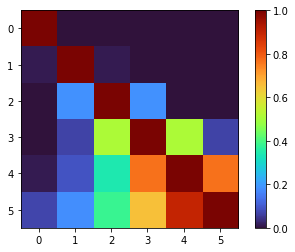

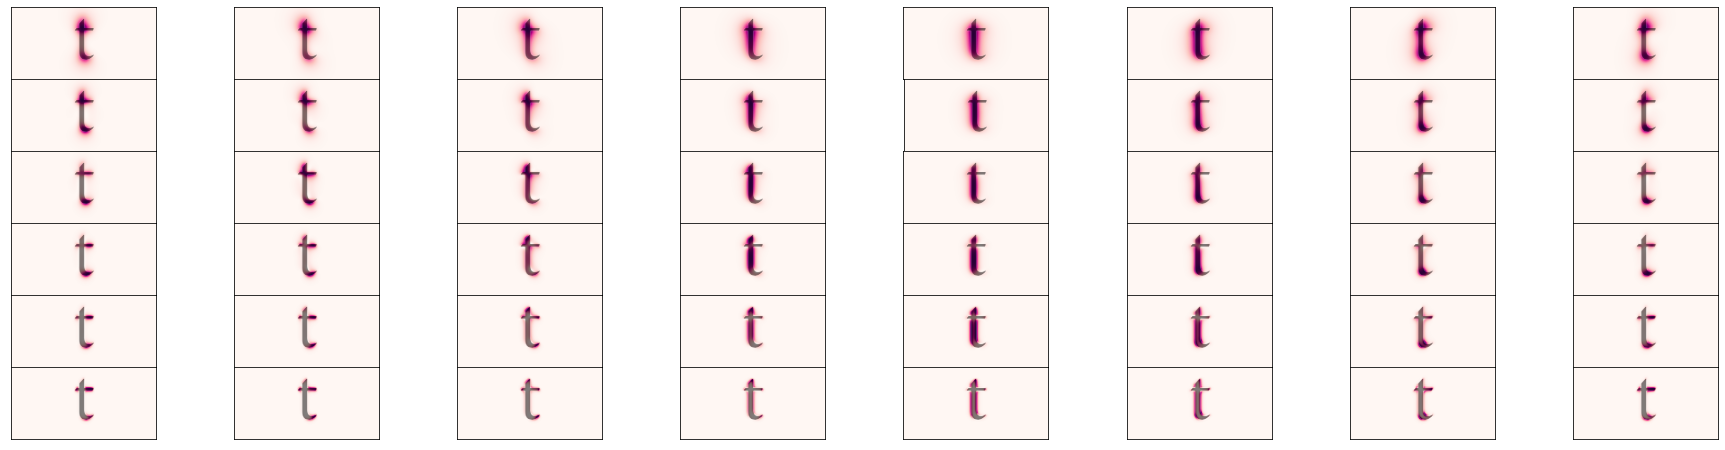

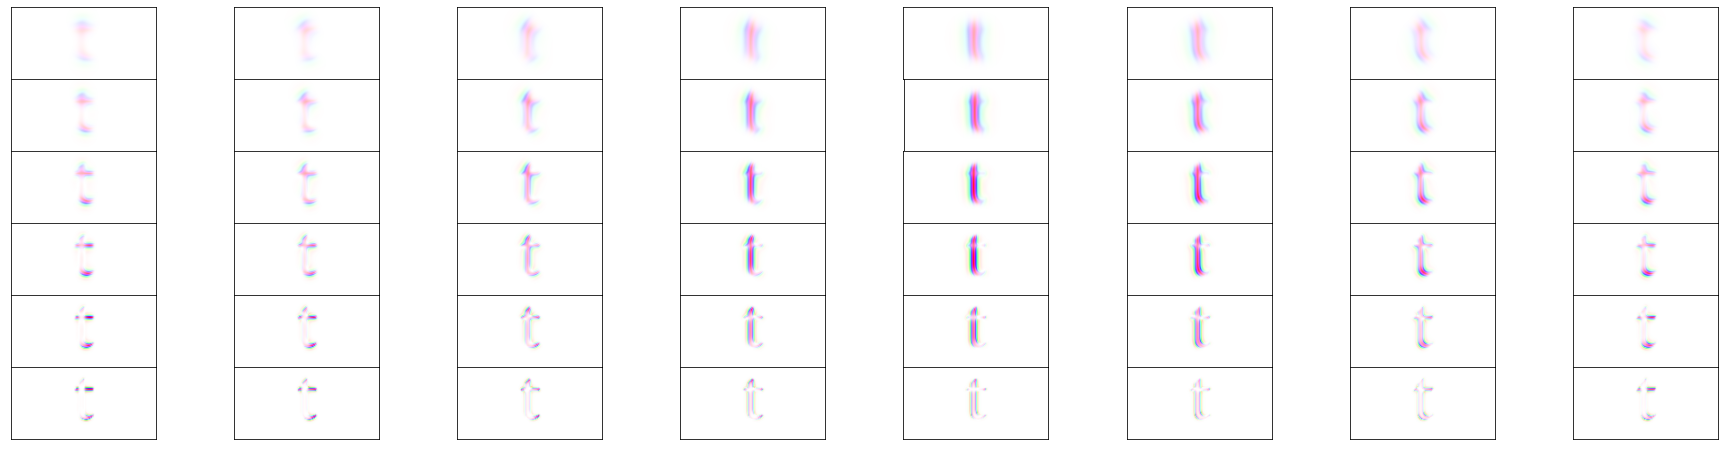

In [66]:
v1_complex = apply_filter_bank(glyph_images[test_letter], v1_filter_bank)  # shape: (6, 8, 80, 161)

# First step: amplify locally based on phase coherence
# Every scale against every other scale, everwhere.
v1r, v1i = jnp.real(v1_complex), jnp.imag(v1_complex)
phase_coherence = ((v1r[:, None, ...] * v1r[None, ...] + v1i[:, None, ...] * v1i[None, ...]))

print(phase_coherence.shape)
# everywhere, we consider the 

sigmas = get_sigmas()
print(sigmas)
frequencies = (1 / sigmas)[None, :]
f_space = jnp.linspace(0, jnp.max(frequencies)*1.2, 1000)[:, None]  # all possible frequencies
# We need a lognormal with mode on f1.
# Lognormal centered on M is y = (M/x) ** (log(x/M)/(2*s**2))
k_f = (frequencies / f_space) ** (jnp.log(f_space / frequencies) / (2*(3/sigmas)**2)) #* (1/sigmas)
if False:
    plt.plot(f_space, k_f)
    for s in sigmas:
        plt.scatter([1/s], [-0.1])
    plt.show()

other_frequencies = (1 / sigmas)[:, None]
frequency_pool = (frequencies / other_frequencies) ** (jnp.log(other_frequencies / frequencies) / (2*(3/sigmas)**2)) # * (sigmas / 60)

if True:
    plt.imshow(frequency_pool.T, cmap="turbo")
    plt.colorbar()
    plt.show()
frequency_pool = jnp.eye(n_v1_scales)
summed_phase_coherence = nn.relu(jnp.einsum("zsoyx,zs->zoyx", phase_coherence, frequency_pool.T))

if True:
    scale_factor = 4
    fig, ax = plt.subplots(n_v1_scales, n_v1_orientations, figsize=(scale_factor * n_v1_orientations, scale_factor * 4 * box_height / box_width), gridspec_kw=dict(wspace=0.0, hspace=0.0), sharex=True, sharey=True)
    for si in range(n_v1_scales):
        for oi in range(n_v1_orientations):
            #ax[si, oi].imshow(jnp.abs(v1_complex)[si, oi, :, :] * (1 + summed_phase_coherence[si, oi, :, :]), cmap='RdPu')
            ax[si, oi].imshow(summed_phase_coherence[si, oi, :, :], cmap='RdPu')
            ax[si, oi].imshow(1-glyph_images[test_letter], cmap="gray", alpha=glyph_images[test_letter] * .5)
            ax[si, oi].grid(False)
            ax[si, oi].set_xticks([])
            ax[si, oi].set_yticks([])
    plt.show()

phase_hsv = np.ones(tuple(np.array(summed_phase_coherence.shape)) + (3,))
#phase_hsv[..., 0] = jnp.abs(jnp.sin(jnp.angle(v1_complex)))  #((jnp.angle(v1_complex) + (2 * jnp.pi)) % (2 * jnp.pi)) / (2 * jnp.pi)
#phase_hsv[..., 0] = ((jnp.angle(v1_complex) + (2 * jnp.pi)) % (2 * jnp.pi)) / (2 * jnp.pi)
phase_hsv[..., 0] = jnp.abs(jnp.angle(v1_complex) / (jnp.pi))
phase_alpha = summed_phase_coherence / jnp.max(summed_phase_coherence)
phase_rgba = jnp.concatenate([hsv_to_rgb(phase_hsv), phase_alpha[..., None]], axis=-1)

fig, ax = plt.subplots(n_v1_scales, n_v1_orientations, figsize=(scale_factor * n_v1_orientations, scale_factor * 4 * box_height / box_width), gridspec_kw=dict(wspace=0.0, hspace=0.0), sharex=True, sharey=True)
for si in range(n_v1_scales):
    for oi in range(n_v1_orientations):
        #ax[si, oi].imshow(jnp.abs(v1_complex)[si, oi, :, :] * (1 + summed_phase_coherence[si, oi, :, :]), cmap='RdPu')
        ax[si, oi].imshow(phase_rgba[si, oi, :, :])
        #ax[si, oi].imshow(1-glyph_images[test_letter], cmap="gray", alpha=glyph_images[test_letter])
        ax[si, oi].grid(False)
        ax[si, oi].set_xticks([])
        ax[si, oi].set_yticks([])
plt.show()

[30.        18.92872   11.943215   7.5356593  4.7546797  3.       ]


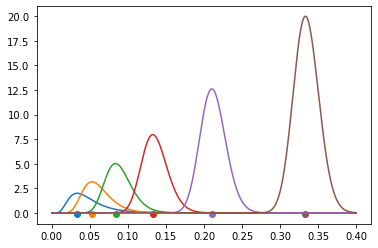

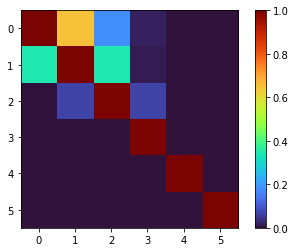

(6, 1, 1, 160, 322)
(6, 1, 8, 160, 322)


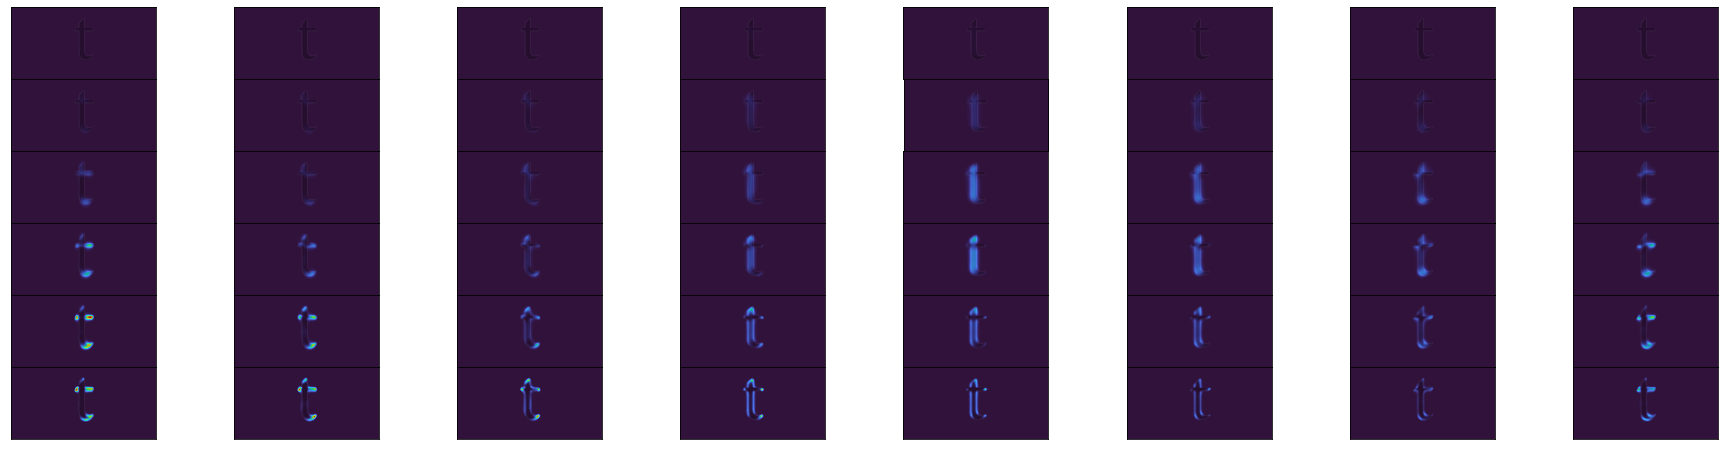

In [98]:
# Now we will perform a normalization procedure.

# First, the pool shall only be the same:

# Divisive normalization means assembling a pool for each scale.
# At each scale, we have a different log-normal for inhibition from different scales.
# At each orientation, we have a von-mises with inhibition from different orientations (narrowness and pedestal)
# At each phase, we have a factor for how much we inhibit from self vs. other (four values)
# There is also spatial pooling: the pools are blurred before adding locally.

# This way, we assemble the pool coefficients, and plot them nicely.

# The lognormal is, we should first plot the sigmas.
# Here, the biggest sigma is the biggest filter.
sigmas = get_sigmas()
print(sigmas)
frequencies = (1 / sigmas)[None, :]
f_space = jnp.linspace(0, jnp.max(frequencies)*1.2, 1000)[:, None]  # all possible frequencies
# We need a lognormal with mode on f1.
# Lognormal centered on M is y = (M/x) ** (log(x/M)/(2*s**2))
k_f = (frequencies / f_space) ** (jnp.log(f_space / frequencies) / (2*(sigmas / 60)**2)) / (sigmas / 60)
plt.plot(f_space, k_f)
for s in sigmas:
    plt.scatter([1/s], [-0.1])
plt.show()

other_frequencies = (1 / sigmas)[:, None]
frequency_pool = (frequencies / other_frequencies) ** (jnp.log(other_frequencies / frequencies) / (2*(sigmas / 60)**2))
plt.imshow(frequency_pool.T, cmap="turbo")
plt.colorbar()
plt.show()
# The first lognormal is that of the largest filter; it should span both low and high frequencies.

# The purpose of this is that the x-axis is fineness. The blue is the coarsest thing, and it should have

# Each scale's pool is the weighted average of each (scale/orientation) image, which has been blurred across angles and x/y.

# So, we first use Gaussians to blur across scales.
r, angle = unit_pgrid(False)
gaussian_blur_filter_scales = sigmas[:, None, None, None, None] / (2*box_width)
gaussian_filters = jnp.exp(-r**2 / gaussian_blur_filter_scales) / jnp.sqrt(jnp.pi * gaussian_blur_filter_scales)
print(gaussian_filters.shape)
if False:
    for si in range(n_v1_scales):
        plt.imshow(gaussian_filters[si, 0, 0, ...])
        plt.colorbar()
        plt.show()


# We also have the angle filter, which is (fortunately) periodic
angle_mask_widths = 4
thetas = jnp.arange(n_v1_orientations, dtype=jnp.float32)[None, None, :, None, None]/n_v1_orientations
angles_p = jnp.exp(angle_mask_widths * jnp.cos(2*jnp.pi * thetas)) / (2*jnp.pi*jnp.i0(angle_mask_widths))
if False:
    plt.plot(angles_p[0, 0, :, 0, 0])
    plt.show()

# So we can combine into a filter as follows:
oxy_filters = gaussian_filters * angles_p
print(oxy_filters.shape)  # there are six blurring filters, which blur across angle,x,y.

filters = jnp.fft.fftn(jnp.fft.fftshift(oxy_filters, [-2, -1]), s=[n_v1_orientations, 2*box_height, 2*box_width], axes=[-3, -2, -1])
images = jnp.fft.fftn(summed_phase_coherence ** 2, s=[n_v1_orientations, 2*box_height, 2*box_width], axes=[-3, -2, -1])[None, ...]
pools = jnp.real(jnp.fft.ifftn(filters * images, axes=[-3, -2, -1])[..., :box_height, :box_width])
summed_pools = jnp.einsum("zsoyx,zs->zoyx", pools, frequency_pool.T)
y = summed_phase_coherence ** 2
beta = jnp.max(y, [-2, -1], keepdims=True) / 2
normed_pools = summed_pools / beta
nspc = y / (beta + normed_pools)

if True:
    scale_factor = 4
    fig, ax = plt.subplots(n_v1_scales, n_v1_orientations, figsize=(scale_factor * n_v1_orientations, scale_factor * 4 * box_height / box_width), gridspec_kw=dict(wspace=0.0, hspace=0.0), sharex=True, sharey=True)
    for si in range(n_v1_scales):
        for oi in range(n_v1_orientations):
            #ax[si, oi].imshow(jnp.abs(v1_complex)[si, oi, :, :] * (1 + summed_phase_coherence[si, oi, :, :]), cmap='RdPu')
            ax[si, oi].imshow(nspc[si, oi, :, :], cmap='turbo', vmax=jnp.max(nspc))
            ax[si, oi].imshow(1-glyph_images[test_letter], cmap="gray", alpha=glyph_images[test_letter] * .2)
            ax[si, oi].grid(False)
            ax[si, oi].set_xticks([])
            ax[si, oi].set_yticks([])
    plt.show()

4 phases, 6 scales


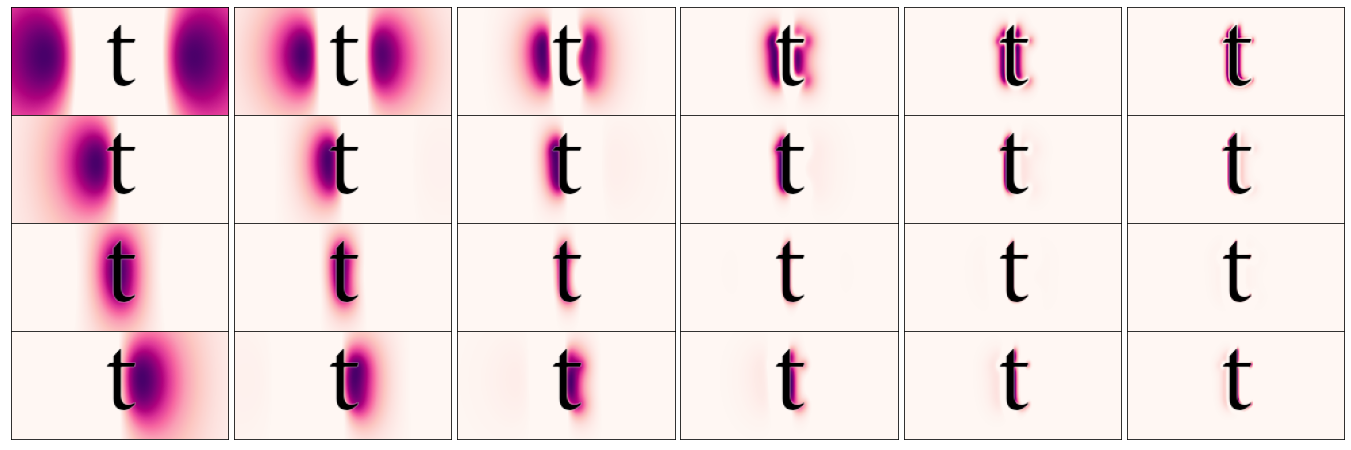

4 phases, scale si=2, all 16 orientations


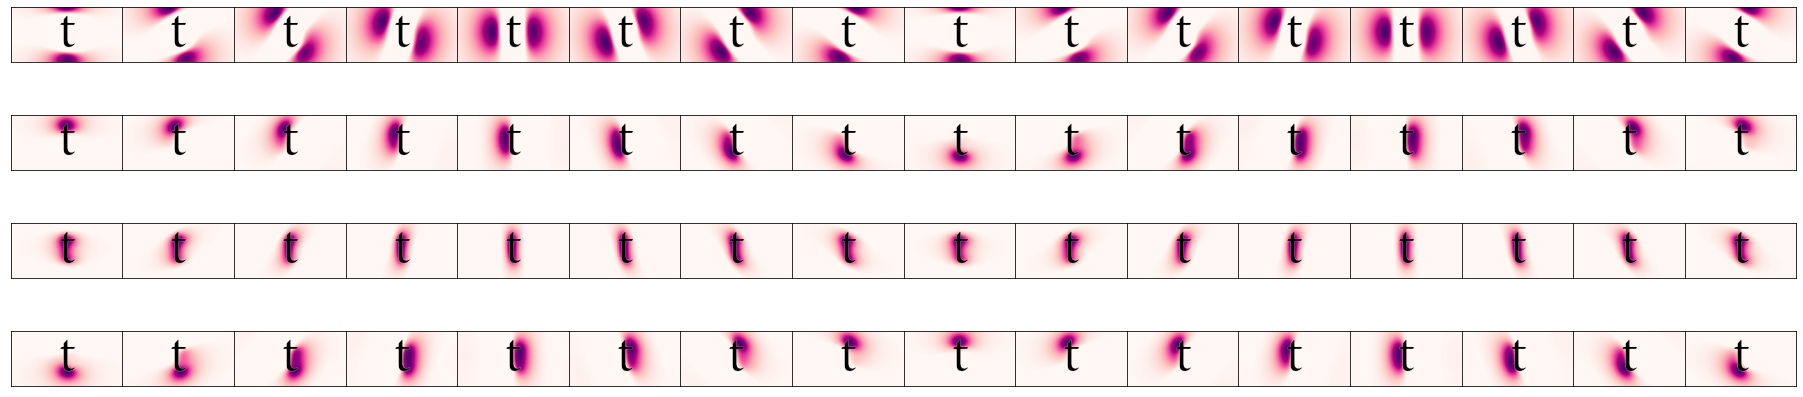

4 phases, scale si=2, all 16 orientations


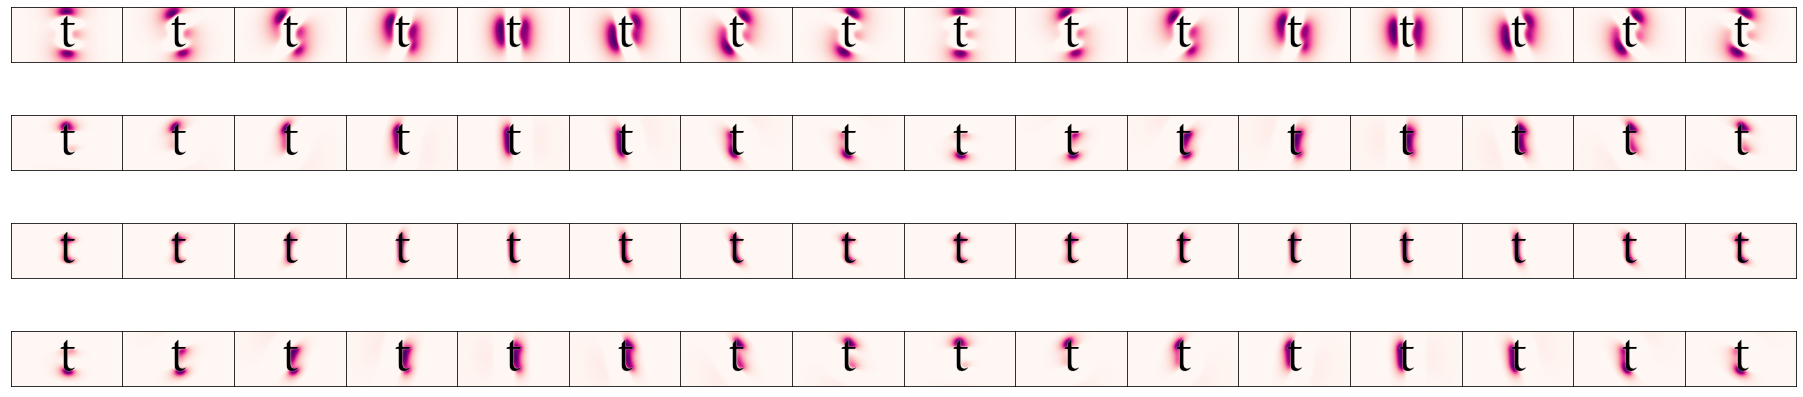

4 phases, scale si=2, all 16 orientations


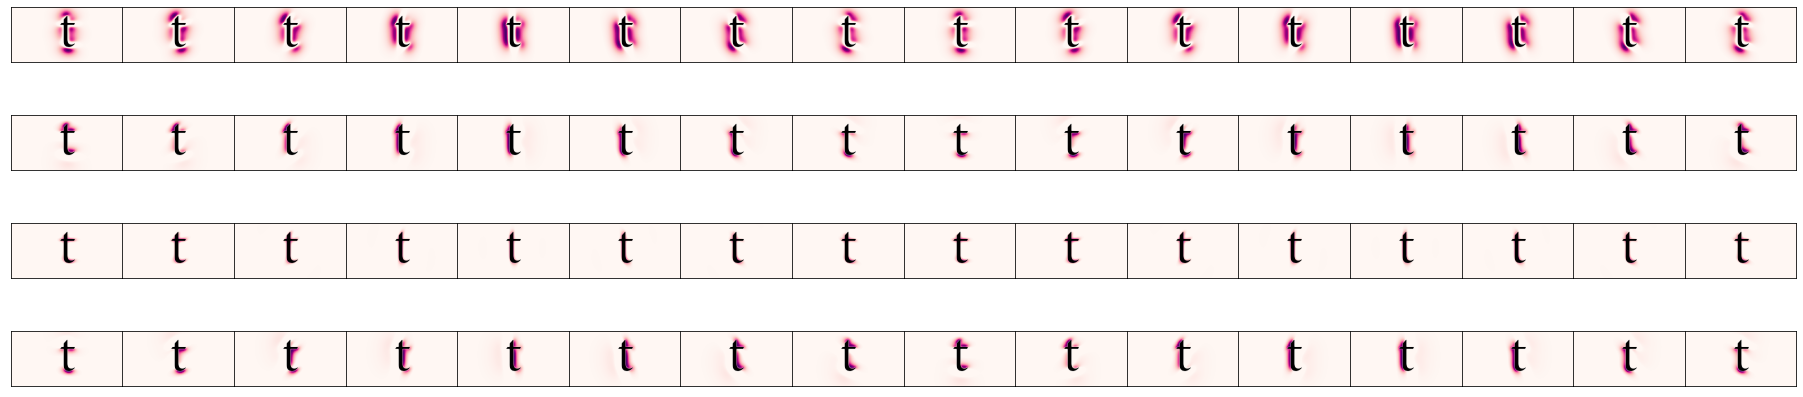

In [8]:
class V1Conv():
    def __init__(self):
        self.v1_filter_bank = v1_filter_bank
    
    def __call__(self, image: NDArray[Shape["H, W"], Float]) -> NDArray[Shape["P, S, B, H, W"], Float]:
        # First, we apply the filter bank itself. This turns the image from [H, W] into a complex [S, A, H, W]:
        v1_complex = apply_filter_bank(image, self.v1_filter_bank)

        # We don't want to deal with complex numbers for two reasons: 1) they're cumbersome, 2) we want to 
        # recombine the opposite-facing edge detector results.
        v1_p0 = nn.relu(jnp.real(v1_complex))
        v1_p1 = nn.relu(jnp.imag(v1_complex))
        v1_p2 = nn.relu(-jnp.real(v1_complex))
        v1_p3 = nn.relu(-jnp.imag(v1_complex))
    
        v1_p0_da = jnp.concatenate([v1_p0, v1_p0], axis=1)
        v1_p1_da = jnp.concatenate([v1_p1, v1_p3], axis=1)
        v1_p2_da = jnp.concatenate([v1_p2, v1_p2], axis=1)
        v1_p3_da = jnp.concatenate([v1_p3, v1_p1], axis=1)
    
        return jnp.stack([v1_p0_da, v1_p1_da, v1_p2_da, v1_p3_da], axis=0)
    
    @staticmethod
    def plot_decomposition(decomposition: NDArray[Shape["P, S, B, H, W"], Float], glyph_image) -> None:
        scale_factor = 4

        print(f"4 phases, {n_v1_scales} scales")
        fig, ax = plt.subplots(4, n_v1_scales, figsize=(scale_factor * n_v1_scales, scale_factor * 4 * box_height / box_width), gridspec_kw=dict(wspace=0.0, hspace=0.0), sharex=True, sharey=True)
        for pi in range(4):
            for si in range(n_v1_scales):
                ax[pi, si].imshow(decomposition[pi, si, 4, :, :], cmap='RdPu')
                ax[pi, si].imshow(1-glyph_image, cmap="gray", alpha=glyph_image)
                ax[pi, si].grid(False)
                ax[pi, si].set_xticks([])
                ax[pi, si].set_yticks([])
        plt.show()

        print(f"4 phases, scale si=2, all {2*n_v1_orientations} orientations")
        fig, ax = plt.subplots(4, 2*n_v1_orientations, figsize=(scale_factor * n_v1_orientations, scale_factor * 4 * box_height / box_width), gridspec_kw=dict(wspace=0.0, hspace=0.0), sharex=True, sharey=True)
        for pi in range(4):
            for oi in range(2*n_v1_orientations):
                ax[pi, oi].imshow(decomposition[pi, 1, oi, :, :], cmap='RdPu')
                ax[pi, oi].imshow(1-glyph_image, cmap="gray", alpha=glyph_image)
                ax[pi, oi].grid(False)
                ax[pi, oi].set_xticks([])
                ax[pi, oi].set_yticks([])
        plt.show()

        print(f"4 phases, scale si=2, all {2*n_v1_orientations} orientations")
        fig, ax = plt.subplots(4, 2*n_v1_orientations, figsize=(scale_factor * n_v1_orientations, scale_factor * 4 * box_height / box_width), gridspec_kw=dict(wspace=0.0, hspace=0.0), sharex=True, sharey=True)
        for pi in range(4):
            for oi in range(2*n_v1_orientations):
                ax[pi, oi].imshow(decomposition[pi, 2, oi, :, :], cmap='RdPu')
                ax[pi, oi].imshow(1-glyph_image, cmap="gray", alpha=glyph_image)
                ax[pi, oi].grid(False)
                ax[pi, oi].set_xticks([])
                ax[pi, oi].set_yticks([])
        plt.show()

        print(f"4 phases, scale si=2, all {2*n_v1_orientations} orientations")
        fig, ax = plt.subplots(4, 2*n_v1_orientations, figsize=(scale_factor * n_v1_orientations, scale_factor * 4 * box_height / box_width), gridspec_kw=dict(wspace=0.0, hspace=0.0), sharex=True, sharey=True)
        for pi in range(4):
            for oi in range(2*n_v1_orientations):
                ax[pi, oi].imshow(decomposition[pi, 3, oi, :, :], cmap='RdPu')
                ax[pi, oi].imshow(1-glyph_image, cmap="gray", alpha=glyph_image)
                ax[pi, oi].grid(False)
                ax[pi, oi].set_xticks([])
                ax[pi, oi].set_yticks([])
        plt.show()

# Test:
v1_conv = V1Conv()
test_v1_decomposition = v1_conv(glyph_images[test_letter]) 
V1Conv.plot_decomposition(test_v1_decomposition, glyph_images[test_letter])


[100.         49.59344    24.595095   12.197554    6.0491867   3.       ]


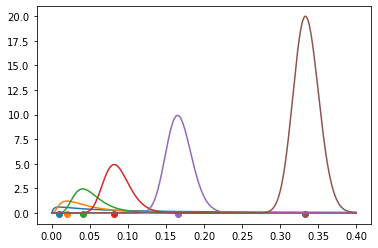

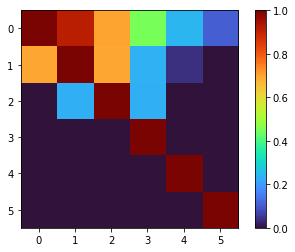

(6, 1, 1, 160, 322)
(6, 1, 8, 160, 322)
filtersshape (6, 1, 8, 320, 644)


In [34]:
# TODO -- for later -- use Sawada-like divisive normalization across scales and neighbouring orientations

# Divisive normalization means assembling a pool for each scale.
# At each scale, we have a different log-normal for inhibition from different scales.
# At each orientation, we have a von-mises with inhibition from different orientations (narrowness and pedestal)
# At each phase, we have a factor for how much we inhibit from self vs. other (four values)
# There is also spatial pooling: the pools are blurred before adding locally.

# This way, we assemble the pool coefficients, and plot them nicely.

# The lognormal is, we should first plot the sigmas.
# Here, the biggest sigma is the biggest filter.
sigmas = get_sigmas()
print(sigmas)
frequencies = (1 / sigmas)[None, :]
f_space = jnp.linspace(0, jnp.max(frequencies)*1.2, 1000)[:, None]  # all possible frequencies
# We need a lognormal with mode on f1.
# Lognormal centered on M is y = (M/x) ** (log(x/M)/(2*s**2))
k_f = (frequencies / f_space) ** (jnp.log(f_space / frequencies) / (2*(sigmas / 60)**2)) / (sigmas / 60)
plt.plot(f_space, k_f)
for s in sigmas:
    plt.scatter([1/s], [-0.1])
plt.show()

other_frequencies = (1 / sigmas)[:, None]
frequency_pool = (frequencies / other_frequencies) ** (jnp.log(other_frequencies / frequencies) / (2*(sigmas / 60)**2))
plt.imshow(frequency_pool.T, cmap="turbo")
plt.colorbar()
plt.show()
# The first lognormal is that of the largest filter; it should span both low and high frequencies.

# The purpose of this is that the x-axis is fineness. The blue is the coarsest thing, and it should have

# Each scale's pool is the weighted average of each (scale/orientation) image, which has been blurred across angles and x/y.

# So, we first use Gaussians to blur across scales.
r, angle = unit_pgrid(False)
gaussian_blur_filter_scales = sigmas[:, None, None, None, None] / (2*box_width)
gaussian_filters = jnp.exp(-r**2 / gaussian_blur_filter_scales)
print(gaussian_filters.shape)
if False:
    for si in range(n_v1_scales):
        plt.imshow(gaussian_filters[si, ...])
        plt.colorbar()
        plt.show()


# We also have the angle filter, which is (fortunately) periodic
angle_mask_widths = 4
thetas = jnp.arange(n_v1_orientations, dtype=jnp.float32)[None, None, :, None, None]/n_v1_orientations
angles_p = jnp.exp(angle_mask_widths * jnp.cos(2*jnp.pi * thetas)) / (2*jnp.pi*jnp.i0(angle_mask_widths))
if False:
    plt.plot(angles_p[:, 0, 0])
    plt.show()

# So we can combine into a filter as follows:
oxy_filters = gaussian_filters * angles_p
print(oxy_filters.shape)  # there are six blurring filters, which blur across angle,x,y.

filters = jnp.fft.fftn(jnp.fft.fftshift(oxy_filters, [-2, -1]), s=[n_v1_orientations, 4*box_height, 4*box_width])
images = 

[[[0.   ]]

 [[0.125]]

 [[0.25 ]]

 [[0.375]]

 [[0.5  ]]

 [[0.625]]

 [[0.75 ]]

 [[0.875]]]


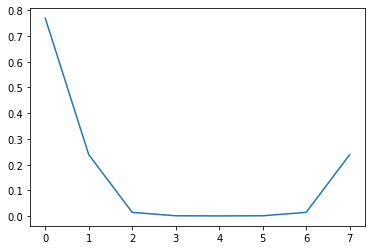

As we can see above:
* Phase 0 picks up on the space outside of the glyph. This probably isn't too relevant to the kind of distance detector we're trying to emulate.
* Phase 1 detects the edges of the letter.
* Phase 2 picks up the skeleton of the letter itself.
* Phase 3 is like phase 1, but shifted by 180°. We don't need it.

Presumably, the distance detectors work primarily on the outsides of the letters. We'll therefore go over the V1 responses with a filter that is 1 at the origin, but has a negative "bubble" in the direction we want to ignore.

Unidirectionalizing masks, all scales; orientation oi=0


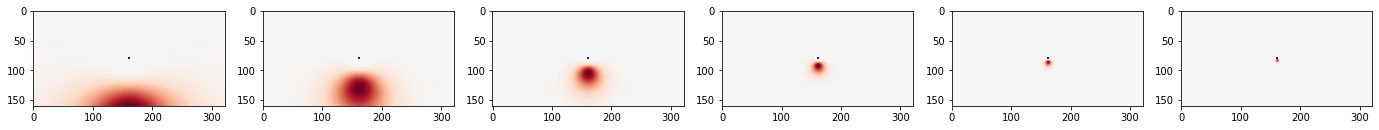

Unidirectionalized edge activations, all scales (gray=multiple overlapping directions active)


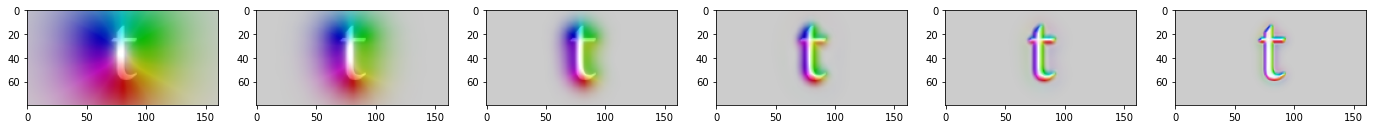

Unidirectionalized skeleton activations, all scales (gray=multiple overlapping directions active)


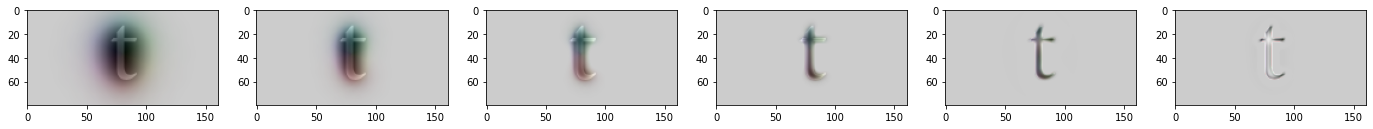

has nan? False


In [ ]:
r, angle = unit_pgrid(False)
r = r.at[box_height, box_width].set(1.e-7)

def _get_angular_masks(angle_mask_widths) -> NDArray[Shape["B, H, W"], Float]:
    thetas = jnp.arange(n_v1_orientations, dtype=jnp.float32)[:, None, None]/n_v1_orientations
    angles_p = jnp.exp(-angle_mask_widths * jnp.cos(angle - 0*jnp.pi - jnp.pi * thetas)) / (2*jnp.pi*jnp.i0(angle_mask_widths))
    angles_n = jnp.exp(-angle_mask_widths * jnp.cos(angle - 1*jnp.pi - jnp.pi * thetas)) / (2*jnp.pi*jnp.i0(angle_mask_widths))

    return jnp.concatenate([angles_p, angles_n], axis=0)


class V1Orient():
    def __init__(self):
        self.asymmetric_masks = self._get_asymmetric_masks()

    @lru_cache(None)
    def _get_asymmetric_masks(self) -> NDArray[Shape["S, B, H, W"], Float]:
        """The masks produced here have a peak in the middle and a trough at some distance on one side."""
        angular_filters = _get_angular_masks(4)[None, ...]

        trough_distances = 80/jnp.array(get_sigmas())[:, None, None, None]
        trough_widths = 0.5  # for now, assume all sizes use the same trough ring size; they could be scale-dependent instead
        trough_masks = jnp.exp(-jnp.log(nn.relu(r[None, None, :, :] * trough_distances))**2/trough_widths)
    
        angular_trough_filters = angular_filters * trough_masks
        
        masks = jnp.zeros_like(angular_trough_filters).at[..., box_height, box_width].set(1.) - angular_trough_filters * .0015

        return jnp.stack([jnp.roll(masks, axis=1, shift=n_v1_orientations), masks], axis=0)

    def plot_asymmetric_masks(self) -> None:
        print("Unidirectionalizing masks, all scales; orientation oi=0")
        fig, ax = plt.subplots(1, n_v1_scales, figsize=(3*n_v1_orientations, 20))
        for si in range(n_v1_scales):
            vmin = jnp.min(self.asymmetric_masks[0, si, 0, ...])
            ax[si].imshow(self.asymmetric_masks[0, si, 0, :, :], cmap="RdBu", vmin=vmin, vmax=-vmin)
        plt.show()

    def __call__(self, v1_decomposition: NDArray[Shape["P, S, B, H, W"], Float]) -> NDArray[Shape["2, S, B, H, W"], Float]:
        """Takes a glyph's V1 tensor, splits it into twice the angles, and zeros out all activations that 
        are dominated by activations further out in the same direction (within the trough)"""
        conv_edges = jnp.roll(apply_filter_bank(
            v1_decomposition[1, ...],
            jnp.fft.fft2(jnp.fft.ifftshift(self.asymmetric_masks[0, ...], [-2, -1]))
        ), axis=1, shift=n_v1_orientations)
        conv_skeletons = apply_filter_bank(
            v1_decomposition[2, ...],
            jnp.fft.fft2(jnp.fft.ifftshift(self.asymmetric_masks[1, ...], [-2, -1]))
        )

        return nn.relu(jnp.real(jnp.stack([conv_edges, conv_skeletons], axis=0)))  # only phases 1 and 2 (not 0 and 3)

    @staticmethod  
    def plot_oriented_v1(udv1: NDArray[Shape["2, S, B, H, W"], Float], glyph_image: NDArray[Shape["H, W"], Float]) -> NDArray[Shape["2, S, H, W, 4"], Float]:
        """
        udv1: the unidirectionally oriented V1 input.

        Returns: a rainbow-style RGBA output, aggregated over all orientations
        """
        max = jnp.max(udv1)
        alpha = jnp.sum(udv1, axis=2) / max
    
        orientation_hue_angles = 2 * np.pi * jnp.arange(udv1.shape[2]) / (udv1.shape[2])
        orientation_hue_sines = jnp.sin(orientation_hue_angles)[None, None, :, None, None]
        orientation_hue_cosines = jnp.cos(orientation_hue_angles)[None, None, :, None, None]
    
        y_sums = jnp.sum(udv1 * orientation_hue_sines, axis=2)
        x_sums = jnp.sum(udv1 * orientation_hue_cosines, axis=2)
        vector_sum_magnitude = jnp.sqrt(y_sums**2 + x_sums**2)
        magnitude_sum = jnp.sum(udv1, axis=2)
    
        udv1_hsv = np.ones(tuple(np.array(udv1.shape)[[0, 1, 3, 4]]) + (3,))
        # HUE IS THE CIRCULAR-AVERAGE HUE ANGLE 
        # When magnitude is very small (compared to overall max), alpha should be very small.
        # VALUE IS VECTOR_SUM_MAGNITUDE / MAGNITUDE_SUM  (black if mixed lots of energy but sum is zeroish)
    
        udv1_hsv[..., 0] = (jnp.arctan2(y_sums, x_sums) + 2 * np.pi) % (2 * np.pi) / (2 * np.pi) 
        udv1_hsv[..., 1] = 1.0 
        udv1_hsv[..., 2] = jnp.sqrt((vector_sum_magnitude + 1e-8) / (magnitude_sum + 1e-8))
    
        rgb = hsv_to_rgb(udv1_hsv)
    
        alpha = magnitude_sum / jnp.max(magnitude_sum, axis=[-2, -1], keepdims=True)
        result = jnp.concatenate([rgb, alpha[..., None]], axis=-1)

        print("Unidirectionalized edge activations, all scales (gray=multiple overlapping directions active)")
        fig, ax = plt.subplots(1, n_v1_scales, figsize=(3*n_v1_orientations, 20))
        for si in range(n_v1_scales):
            ax[si].imshow(result[0, si, :, :, :])
            ax[si].imshow(glyph_image, cmap="gray", alpha=.2)
        plt.show()

        print("Unidirectionalized skeleton activations, all scales (gray=multiple overlapping directions active)")
        fig, ax = plt.subplots(1, n_v1_scales, figsize=(3*n_v1_orientations, 20))
        for si in range(n_v1_scales):
            ax[si].imshow(result[1, si, :, :, :])
            ax[si].imshow(glyph_image, cmap="gray", alpha=.2)

        plt.show()

# Test
v1_orient = V1Orient()
v1_orient.plot_asymmetric_masks()

test_oriented_v1 = v1_orient(test_v1_decomposition)
V1Orient.plot_oriented_v1(test_oriented_v1, glyph_images[test_letter])

print("has nan?", jnp.isnan(jnp.sum(test_oriented_v1)))

active_region_bounds [1.863354   0.92410135 0.45829368 0.22728363 0.11271776 0.05590062
 0.        ]
active_region_sharpness [ 1.61      3.246397  6.546021 13.199368 26.615147 53.666664  0.      ]
sigmas [0.621118   0.3080338  0.15276456 0.07576121 0.03757259 0.01863354]
Excitatory distance-collecting filters, all scales


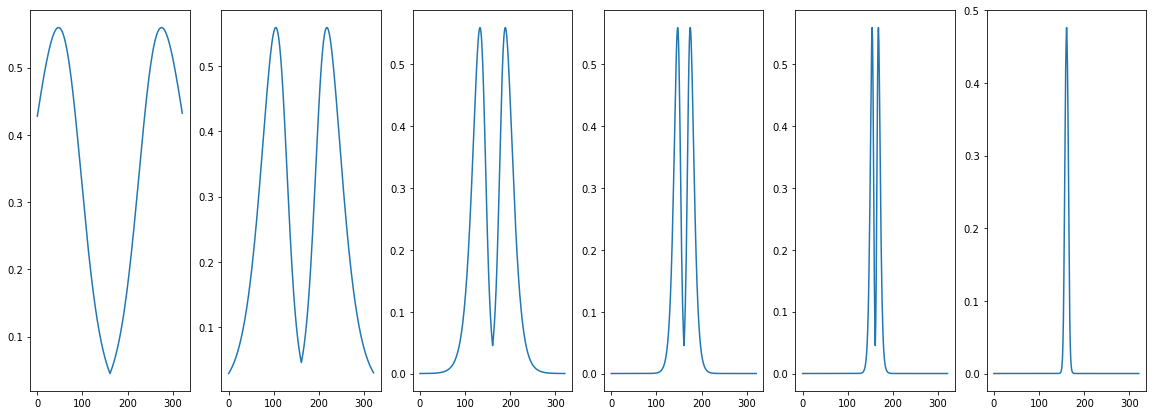

Inhibitory distance-collecting ring filters


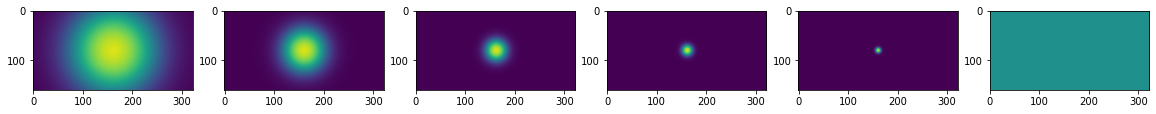

Excitatory f_filters, all scales


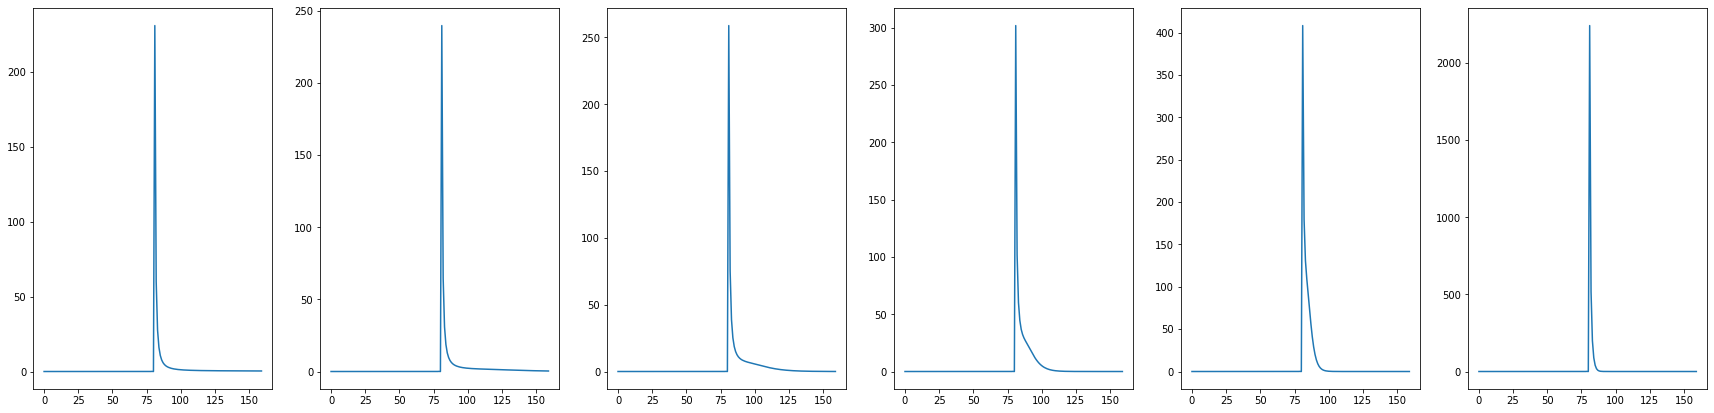

d_filters


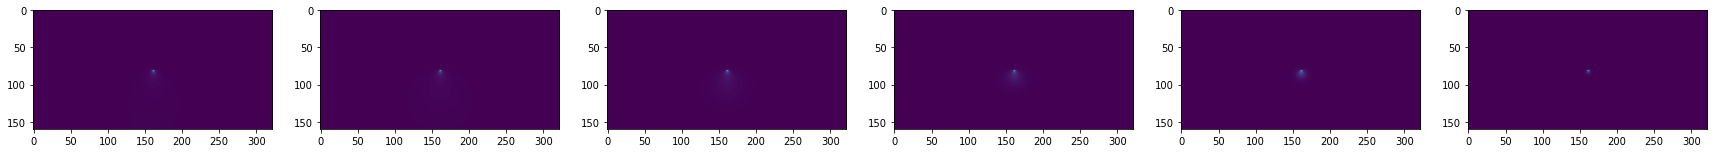

In [ ]:
def _get_ring_excitatory_inhibitory_filters(sigmas):
    # Now we want to mask each of these filters into active (peripheral) and inhibitive (central) rings.
    # For every sigma, the minimum distance these filters detect are about 3*sigma?
    active_region_bounds = jnp.concatenate([sigmas * 3, sigmas[-1:] * 0], axis=0)[:, None, None, None]
    active_region_sharpness = jnp.concatenate([1/sigmas, 0/sigmas[-1:]], axis=0)[:, None, None, None]

    r_ring_filters = (
        nn.sigmoid(  # start at active_region_bounds[1:, ...]
            - active_region_bounds[1:, ...] * active_region_sharpness[1:, ...] + r * active_region_sharpness[1:, ...]
        ) * (1 - nn.sigmoid(   # end at active_region_bounds[:-1, ...]
            - active_region_bounds[:-1, ...] * active_region_sharpness[:-1, ...] + r * active_region_sharpness[:-1, ...]
        ))
    )

    r_ring_inhibitory_filters = (
        1 - nn.sigmoid(-active_region_bounds[1:, ...] * active_region_sharpness[1:, ...] + r * active_region_sharpness[1:, ...])
    )
    print("active_region_bounds", active_region_bounds[..., 0, 0, 0])
    print("active_region_sharpness", active_region_sharpness[..., 0, 0, 0])

    return r_ring_filters, r_ring_inhibitory_filters

class DistanceEst:
    # We now use this to calculate distances facing away from the respective pieces (though only within 
    # the reach of the negative bulb of the outside-only filter).

    def __init__(self):
        self.sigmas = get_sigmas() / box_width
        self.r_ring_filters, self.r_ring_inhibitory_filters = _get_ring_excitatory_inhibitory_filters(self.sigmas)
        self.k = 2
        self.f_filters, self.d_filters, self.i_filters = self._get_fd_filters()

    def _get_fd_filters(self) -> None:
        angular_filters = jnp.roll(_get_angular_masks(4)[None, ...], shift=n_v1_orientations, axis=1) # rotate by 180°
        r, angle = unit_pgrid(False)
        #r = r.at[box_height, box_width].set(1.)[None, None, :, :]
        f1_filter_xy = 1 / (r)**self.k
        f2_filter_xy = 1 / (r)**(self.k+1)

        f1_filter_xy = f1_filter_xy.at[box_height, box_width].set(0.)
        f2_filter_xy = f2_filter_xy.at[box_height, box_width].set(0.)
    
        f_filters_oxy = angular_filters * f1_filter_xy
        d_filters_oxy = angular_filters * f2_filter_xy
    
        f_filters = f_filters_oxy * self.r_ring_filters
        d_filters = d_filters_oxy * self.r_ring_filters
        inhibitory_filters = f_filters_oxy * self.r_ring_inhibitory_filters

        return (f_filters, d_filters, inhibitory_filters)


    def plot_fd_filters(self):
        print("sigmas", self.sigmas)
        print("Excitatory distance-collecting filters, all scales")
        fig, ax = plt.subplots(1, self.r_ring_filters.shape[0], figsize=(20, 7))
        for i in range(self.r_ring_filters.shape[0]):
            ax[i].plot(self.r_ring_filters[i, 0, box_height, :]) #, vmin=-0.01, vmax=1.01)
        plt.show()

        print("Inhibitory distance-collecting ring filters")
        fig, ax = plt.subplots(1, self.r_ring_filters.shape[0], figsize=(20, 7))
        for i in range(self.r_ring_filters.shape[0]):
            ax[i].imshow(self.r_ring_inhibitory_filters[i, 0, :, :], vmin=0, vmax=1)
        plt.show()

        print("Excitatory f_filters, all scales")
        fig, ax = plt.subplots(1, self.f_filters.shape[0], figsize=(30, 7))
        for i in range(self.f_filters.shape[0]):
            ax[i].plot(self.f_filters[i, 0, :, box_width])
        plt.show()

        print("d_filters")
        fig, ax = plt.subplots(1, self.d_filters.shape[0], figsize=(30, 7))
        for i in range(self.d_filters.shape[0]):
            ax[i].imshow(jnp.sqrt(self.d_filters[i, 0, :, :]))
        plt.show()

    def __call__(self, oriented_v1):
        f_conved_xy = nn.relu(jnp.real(apply_filter_bank(oriented_v1, jnp.fft.fft2(jnp.fft.ifftshift(self.f_filters, [-2, -1])))))
        d_conved_xy = nn.relu(jnp.real(apply_filter_bank(oriented_v1, jnp.fft.fft2(jnp.fft.ifftshift(self.d_filters, [-2, -1])))))
        i_conved_xy = nn.relu(jnp.real(apply_filter_bank(oriented_v1, jnp.fft.fft2(jnp.fft.ifftshift(self.i_filters, [-2, -1])))))
        
        excitatory_confidences = (f_conved_xy * jnp.where(d_conved_xy, f_conved_xy / d_conved_xy, 0) ** (self.k-1))

        # Clips distances to where confidence isn't negligible, which is also where numerical blow-ups tend to happen
        distances = jnp.where(excitatory_confidences > 1, f_conved_xy / d_conved_xy, 0)

        # dampen out the inhibition: using the simplest possible linear model; wherever inhibition is at its max, factor=0, wherever it's zero, factor=1
        inhibitive_dampening_factor = jnp.ones_like(excitatory_confidences) #  (jnp.max(i_conved_xy, axis=[-2, -1], keepdims=True) - i_conved_xy) / jnp.max(i_conved_xy, axis=[-2, -1], keepdims=True)

        # artificial confidence changing (until we have DN going)
        factors = jnp.array([0.1, 0.2, 0.3, 0.5, 0.7, 1.5])[None, :, None, None, None]

        return (excitatory_confidences * inhibitive_dampening_factor * factors, distances)

    @staticmethod
    def plot_dist_activations(confidences, distances, glyph_image):
        udv1_hsv = np.ones(tuple(distances.shape) + (3,))
        # HUE IS THE CIRCULAR-AVERAGE HUE ANGLE 
        # When magnitude is very small (compared to overall max), alpha should be very small.
        # VALUE IS VECTOR_SUM_MAGNITUDE / MAGNITUDE_SUM  (black if mixed lots of energy but sum is zeroish)
    
        udv1_hsv[..., 0] = jnp.clip(distances, 0, 1)
        udv1_hsv[..., 1] = 1.0 
        udv1_hsv[..., 2] = 1.0
    
        rgb = hsv_to_rgb(udv1_hsv)
    
        alpha = jnp.where(confidences, confidences / jnp.max(confidences, axis=[-4, -2, -1], keepdims=True), 0)
        result = jnp.concatenate([rgb, alpha[..., None]], axis=-1)
    
        fig, ax = plt.subplots(4, n_v1_scales, figsize=(30, 12))
        
        print("Confidence-weighted distances (from clipped; edges+skeletons) - Confidences (edges+skeletons). All scales, orientation oi=4")
        oi = 12
        for si in range(n_v1_scales):
            # Confidence-weighted Distance
            ax[0, si].imshow(result[0, si, oi, ...])
            ax[0, si].imshow(glyph_image, cmap="gray", alpha=.2)
            # Confidence-weighted Distance
            ax[1, si].imshow(result[1, si, oi, ...])
            ax[1, si].imshow(glyph_image, cmap="gray", alpha=.2)

            cm_edges = jnp.max(confidences[0, :, oi, ...]) 
            cm_skeletons = jnp.max(confidences[1, :, oi, ...]) 
            # Confidence
            ax[2, si].imshow(confidences[0, si, oi, ...], cmap="turbo", vmax=cm_edges)
            ax[2, si].imshow(glyph_image, cmap="gray", alpha=.2)
            ax[3, si].imshow(confidences[1, si, oi, ...], cmap="turbo", vmax=cm_skeletons)
            ax[3, si].imshow(glyph_image, cmap="gray", alpha=.2)
        plt.show()

# Test
distance_est = DistanceEst()
distance_est.plot_fd_filters()

Confidence-weighted distances (from clipped; edges+skeletons) - Confidences (edges+skeletons). All scales, orientation oi=4


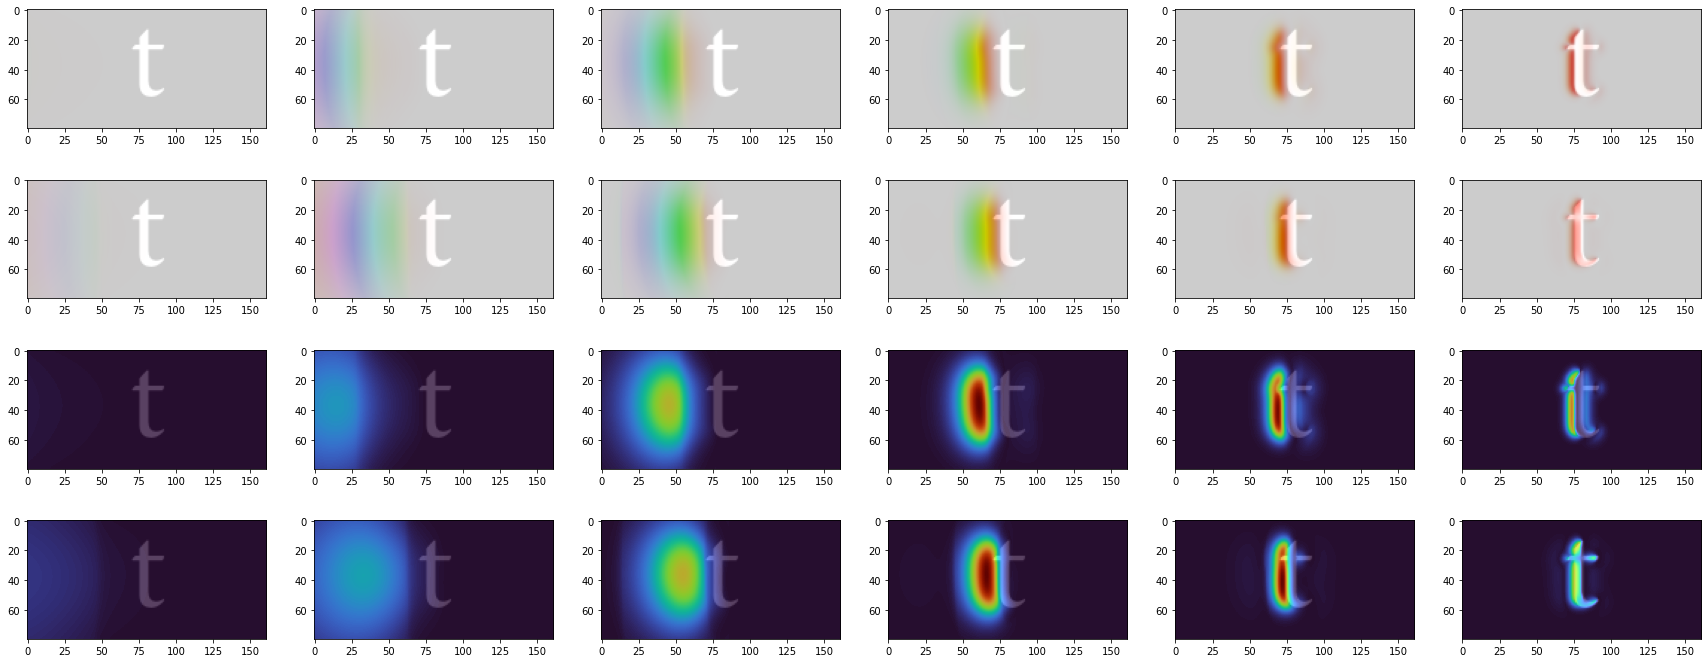

In [ ]:
(test_conf, test_dist) = distance_est(test_oriented_v1)

DistanceEst.plot_dist_activations(test_conf, test_dist, glyph_images[test_letter])

test_repr_distance (2, 80, 161) test_repr_orientation (2, 80, 161) norm_conf (2, 6, 16, 80, 161)
Averaged distances (phase 0, edges):


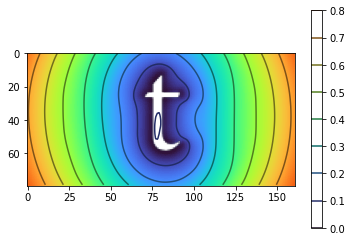

Averaged orientations (phase 0, edges):


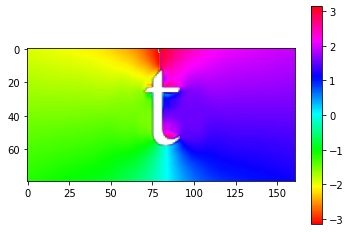

Averaged scales (phase 0, edges):


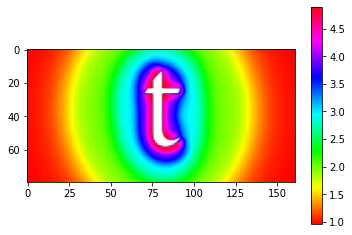

Averaged distances (phase 1, skeletons):


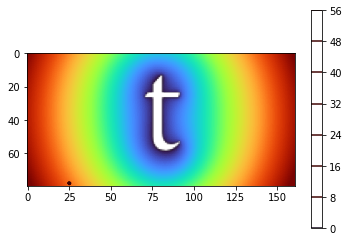

Averaged orientations (phase 1, skeletons):


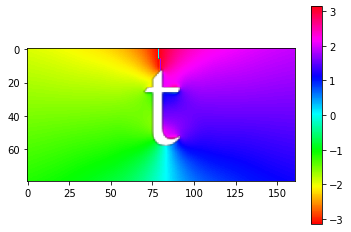

Averaged scales (phase 1, skeletons):


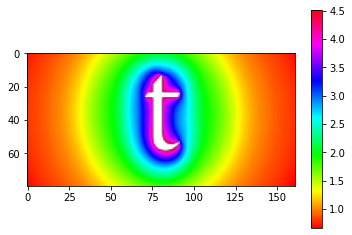

In [ ]:
class DistanceEstAgg:
    def __init__(self):
        self.orientation_hue_angles = (2 * np.pi * jnp.arange(16) / (16))
        self.orientation_hue_sines = jnp.sin(self.orientation_hue_angles)[None, None, :, None, None]
        self.orientation_hue_cosines = jnp.cos(self.orientation_hue_angles)[None, None, :, None, None]
        self.scales = jnp.arange(n_v1_scales)[None, :, None, None, None]

    def __call__(self, confidences, distances):
        norm_conf = (confidences**2
                    / (
                        (jnp.max(confidences, axis=[-2, -1], keepdims=True) * 0.2)**2
                        + jnp.sum(confidences**2, axis=[1, 2], keepdims=True)
                        ) )
        
        repr_distance = jnp.sum((distances * norm_conf), axis=[1, 2])

        co_mean_x = jnp.sum(self.orientation_hue_cosines * norm_conf, axis=[1, 2])
        co_mean_y = jnp.sum(self.orientation_hue_sines * norm_conf, axis=[1, 2])
        repr_orientation = jnp.arctan2(co_mean_y, co_mean_x)

        repr_scale = jnp.sum(self.scales * norm_conf, axis=[1, 2])

        return repr_distance, repr_orientation, repr_scale, norm_conf

    @staticmethod
    def plot_repr(repr_distance, repr_orientation, repr_scale, glyph_image):
        for (pi, pname) in [(0, "edges"), (1, "skeletons")]:
            print(f"Averaged distances (phase {pi}, {pname}):")
            plt.imshow(repr_distance[pi, ...], cmap='turbo', vmax=1.)
            plt.contour(repr_distance[pi, ...], cmap='darkturbo', vmax=1.)
            plt.colorbar()
            plt.imshow(glyph_image, cmap="gray", alpha=glyph_image)
            plt.show()
            
            print(f"Averaged orientations (phase {pi}, {pname}):")
            plt.imshow(repr_orientation[pi, ...], cmap='hsv')
            plt.colorbar()
            plt.imshow(glyph_image, cmap="gray", alpha=glyph_image)
            plt.show()

            print(f"Averaged scales (phase {pi}, {pname}):")
            plt.imshow(repr_scale[pi, ...], cmap='hsv')
            plt.colorbar()
            plt.imshow(glyph_image, cmap="gray", alpha=glyph_image)
            plt.show()

distance_est_agg = DistanceEstAgg()

test_repr_distance, test_repr_orientation, test_repr_scale, norm_conf = distance_est_agg(test_conf, test_dist)
print("test_repr_distance", test_repr_distance.shape, "test_repr_orientation", test_repr_orientation.shape, "norm_conf", norm_conf.shape)
DistanceEstAgg.plot_repr(test_repr_distance, test_repr_orientation, test_repr_scale, glyph_images[test_letter])

# TODO: estimate a collinearity map from the gradient of the divergence map 

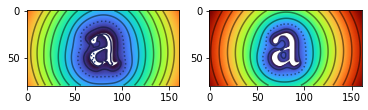

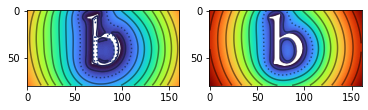

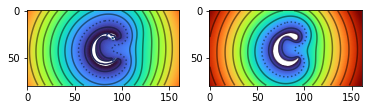

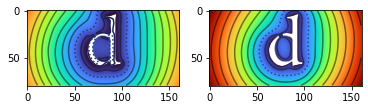

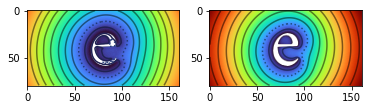

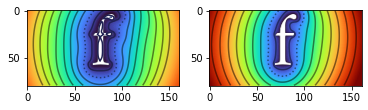

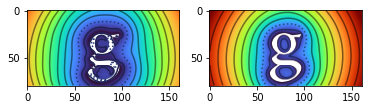

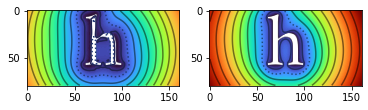

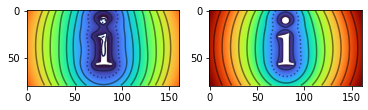

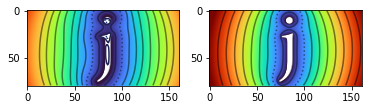

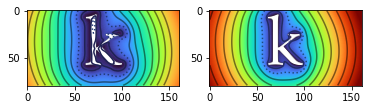

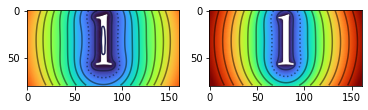

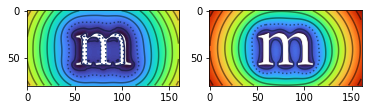

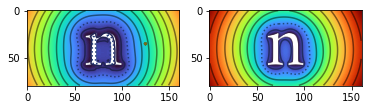

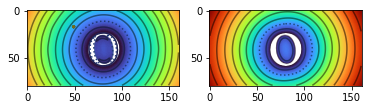

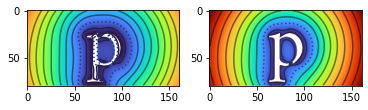

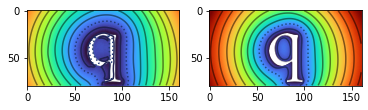

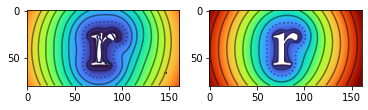

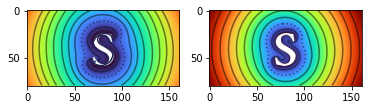

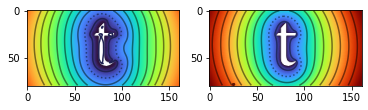

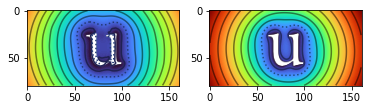

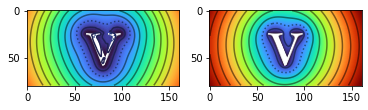

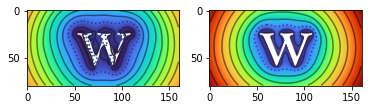

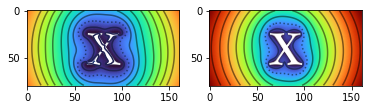

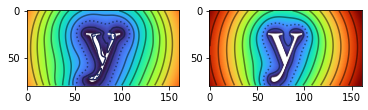

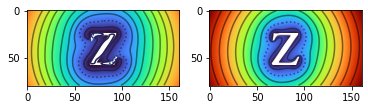

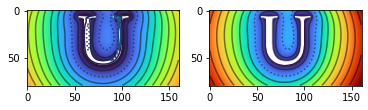

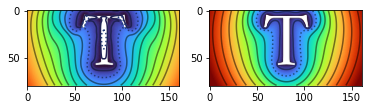

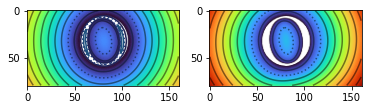

In [ ]:
for gi, g in enumerate(glyph_char_list):
    v1_decomposition = v1_conv(glyph_images[g]) 
    oriented_v1 = v1_orient(v1_decomposition)
    (conf, dist) = distance_est(oriented_v1)
    repr_distance, repr_orientation, repr_scale, norm_conf = distance_est_agg(conf, dist)
    fig, ax = plt.subplots(1, 2) #, figsize=(20, 7))
    for pi in range(2):
        ax[pi].imshow(repr_distance[pi, ...], cmap="turbo", vmax=1.0)
        ax[pi].contour(repr_distance[pi, ...], cmap="darkturbo", vmax=1.0,
                       levels=jnp.arange(0, 1.0, 0.1) if pi == 1 else jnp.arange(0, .7, 0.07),
                       linestyles=(["solid", "solid", "dotted"] + ["solid"] * 6))
        ax[pi].imshow(glyph_images[g], cmap="gray", alpha=glyph_images[g])
    plt.show()


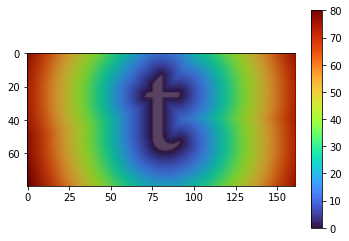

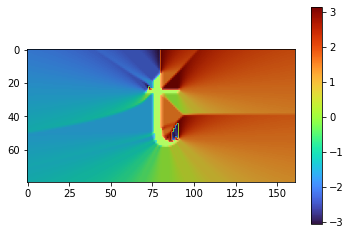

In [ ]:
# Comparison with the distance field resulting from Euclidean distance fields:

edt = distance_transform_edt(glyph_images[test_letter] < 0.5)
plt.imshow(edt, cmap='turbo')
plt.colorbar()
plt.imshow(glyph_images[test_letter], cmap="gray", alpha=.2)
plt.show()

x, y = np.gradient(edt)
plt.imshow(np.arctan2(y, x), cmap='turbo')
plt.colorbar()
plt.imshow(glyph_images[test_letter], cmap="gray", alpha=.2)
plt.show()

First experimentation: how do letters fit together?

Collinearity fields (to modulate the relevance of measured distances where e.g. serifs meet) 

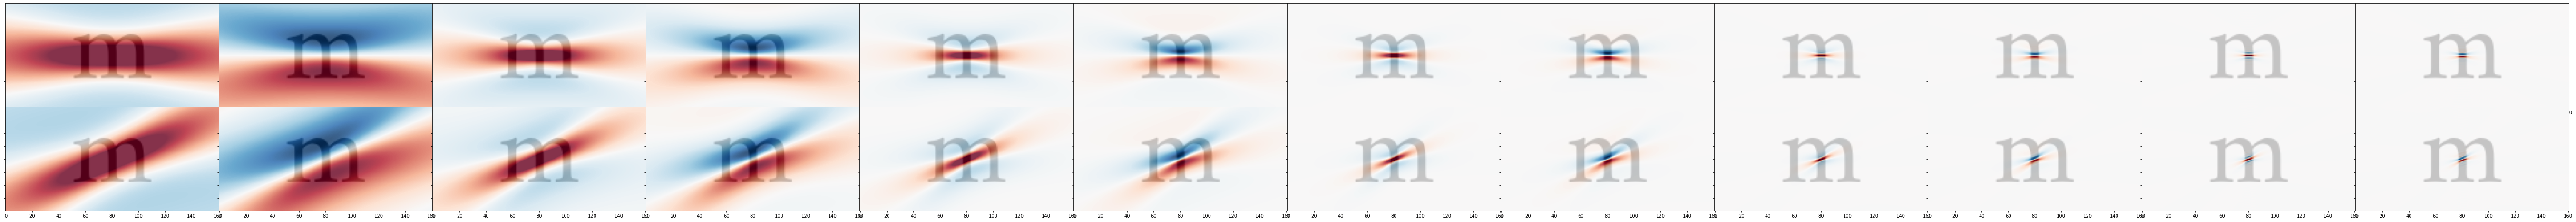

In [ ]:
# Now let's fix the one-sided collinearity filters

es_filter_bank = get_loggabor_filter_bank(24, display_filters=True, display_fft=False)

es shape (6, 8, 160, 322) (6, 16, 160, 322)
2 phases, 6 scales


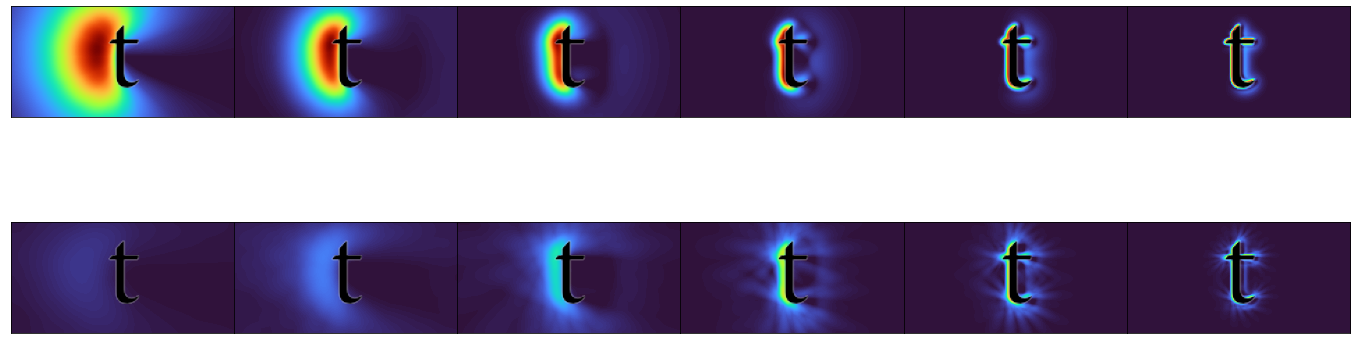

In [ ]:
class ESConv():
    def __init__(self):
        self.es_filter_bank = jnp.roll(jnp.concatenate([es_filter_bank, -es_filter_bank], axis=1), shift=0, axis=1)
        self.es_filter_bank
        print("es shape", es_filter_bank.shape, self.es_filter_bank.shape)

    def __call__(self, image: NDArray[Shape["P, S, B, H, W"], Float]) -> NDArray[Shape["P, S, B, H, W"], Float]:
        # First, we apply the filter bank itself. This turns the image from [H, W] into a complex [S, A, H, W]:
        es_raw_edges_right = nn.relu(-jnp.real(apply_filter_bank(image[1, ...], self.es_filter_bank)))
        es_raw_edges_left = nn.relu(jnp.real(apply_filter_bank(image[1, ...], self.es_filter_bank)))
        es_raw_edges = es_raw_edges_right #+ jnp.roll(es_raw_edges_left, axis=1, shift=8)

        es_raw_skeletons = jnp.abs(jnp.real(apply_filter_bank(image[2, ...], self.es_filter_bank)))
        return jnp.stack([es_raw_edges, es_raw_skeletons], axis=0)
    
    @staticmethod
    def plot_decomposition(es: NDArray[Shape["P, S, B, H, W"], Float], v1_image, glyph_image) -> None:
        scale_factor = 4

        print(f"2 phases, {n_v1_scales} scales")
        for pi in range(1):
            fig, ax = plt.subplots(2, n_v1_scales, figsize=(scale_factor * n_v1_scales, scale_factor * 4 * box_height / box_width), gridspec_kw=dict(wspace=0.0, hspace=0.0), sharex=True, sharey=True)
            vm = jnp.max(jnp.sum(es[pi, ...], axis=1))
            for si in range(n_v1_scales):
                ax[0, si].imshow(jnp.sum(v1_image[pi+1, si, 0:8, ...], axis=0), cmap='turbo')
                ax[0, si].imshow(1-glyph_image, cmap="gray", alpha=glyph_image)
                ax[0, si].grid(False)
                ax[0, si].set_xticks([])
                ax[0, si].set_yticks([])
                ax[1, si].imshow(jnp.sum(es[pi, si, 0:8, ...], axis=0), cmap='turbo', vmax=vm)
                ax[1, si].imshow(1-glyph_image, cmap="gray", alpha=glyph_image)
                ax[1, si].grid(False)
                ax[1, si].set_xticks([])
                ax[1, si].set_yticks([])
            plt.show()


# Test:
es_conv = ESConv()
test_es = es_conv(test_v1_decomposition)

ESConv.plot_decomposition(test_es, test_v1_decomposition, glyph_images[test_letter])

In [ ]:
def colinearity_color(col):
    orientation_hue_angles = 2 * np.pi * jnp.arange(col.shape[2]) / (2 * col.shape[2])
    orientation_hue_sines = jnp.sin(orientation_hue_angles)[None, None, :, None, None]
    orientation_hue_cosines = jnp.cos(orientation_hue_angles)[None, None, :, None, None]

    y_sums = jnp.sum(col * orientation_hue_sines, axis=2)
    x_sums = jnp.sum(col * orientation_hue_cosines, axis=2)
    vector_sum_magnitude = jnp.sqrt(y_sums**2 + x_sums**2)
    magnitude_sum = jnp.sum(col, axis=2)

    col_hsv = np.ones(tuple(np.array(col.shape)[[0, 1, 3, 4]]) + (3,))
    # HUE IS THE CIRCULAR-AVERAGE HUE ANGLE 
    # When magnitude is very small (compared to overall max), alpha should be very small.
    # VALUE IS VECTOR_SUM_MAGNITUDE / MAGNITUDE_SUM  (black if mixed lots of energy but sum is zeroish)

    col_hsv[..., 0] = (jnp.arctan2(y_sums, x_sums) + 2 * np.pi) % (2 * np.pi) / (2 * np.pi) 
    #col_hsv[..., 0] = jnp.sum(nn.softmax(col, axis=2) * jnp.arange(2*n_v1_orientations)[None, None, :, None, None] / (4*n_v1_orientations), axis=2)
    #col_hsv[..., 0] = jnp.sum((col == jnp.argmax(col, axis=2, keepdims=True)) * jnp.arange(2*n_v1_orientations)[None, None, :, None, None] / (2*n_v1_orientations), axis=2)
    col_hsv[..., 1] = 1. #/jnp.sum(col * jnp.log(col), axis=2)
    col_hsv[..., 2] = (vector_sum_magnitude + 1e-8) / (magnitude_sum + 1e-8)
    #col_hsv[..., 2] = 1. #jnp.sqrt((vector_sum_magnitude + 1e-8) / (magnitude_sum + 1e-8))
    rgb = hsv_to_rgb(col_hsv)

    # The total strength of the collinearity everywhere is the strength put through a sigmoid filter.
    alpha = magnitude_sum / (0.5 + magnitude_sum)
    return jnp.concatenate([rgb, alpha[..., None]], axis=-1)

color_colinearity = colinearity_color(nn.relu(jnp.real(collinearity)))

plt.imshow(jnp.sum(nn.relu(jnp.real(collinearity)), axis=2)[2, 3, ...])
plt.colorbar()
plt.show()

fig, ax = plt.subplots(1, n_v1_scales, figsize=(20, 7))
for si in range(n_v1_scales):
    #ax[si].imshow(udv_angle(ov1)[pi, si, ...])
    print("max", si, jnp.max(nn.relu(jnp.real(collinearity))[2, si, ...]))
    ax[si].imshow(color_colinearity[2, si, ...])
    ax[si].imshow(glyph_images[letter], cmap="gray", alpha=.2)

plt.show()

print(ov1.shape)

fig, ax = plt.subplots(1, 16, figsize=(40, 7))
for oi in range(16):
    ax[oi].imshow(ov1[2, 3, oi, ...])
    ax[oi].imshow(glyph_images[letter], cmap="gray", alpha=.2)
plt.show()

fig, ax = plt.subplots(1, 16, figsize=(40, 7))
for oi in range(16):
    ax[oi].imshow(collinearity_filters_ifft[3, oi, ...])
plt.show()


fig, ax = plt.subplots(1, 16, figsize=(40, 7))
for oi in range(16):
    ax[oi].imshow(nn.relu(jnp.real(collinearity))[2, 3, oi, ...])
plt.show()

In [ ]:
# We now want to display the collinearity map as a quiver field with alpha = strength and color = distance.

def collinearity_quiver(col):
    orientation_hue_angles = 2 * np.pi * jnp.arange(col.shape[2]) / col.shape[2]
    orientation_hue_sines = jnp.sin(orientation_hue_angles)[None, None, :, None, None]
    orientation_hue_cosines = jnp.cos(orientation_hue_angles)[None, None, :, None, None]

    y_sums = jnp.sum(col * orientation_hue_sines, axis=(1, 2))
    x_sums = jnp.sum(col * orientation_hue_cosines, axis=(1, 2))
    angles = jnp.arctan2(y_sums, x_sums)
    y = jnp.sin(angles)[0, ...]
    x = jnp.cos(angles)[0, ...]

    # The colors show the average scale.
    scale_hues = jnp.arange(col.shape[1])[None, :, None, None, None] / col.shape[1]
    colors = jnp.sum(col * scale_hues, axis=(1, 2)) / jnp.sum(col, axis=(1, 2))
    hsv_c = hsv_to_rgb(jnp.stack([colors, jnp.ones_like(colors), jnp.ones_like(colors)], axis=-1))

    # The total strength of the collinearity everywhere is the strength put through a sigmoid filter.
    total_sum = jnp.sum(col, axis=(1, 2))[0, ...]
    alpha = jnp.nan_to_num(total_sum / (0.5 + total_sum), nan=0.0)

    return x * alpha, y * alpha, angles #, jnp.concatenate([hsv_c[0, ...], alpha[0, ..., None]], axis=-1)

x, y, angles = collinearity_quiver(nn.relu(jnp.real(collinearity)))
fig = plt.figure(figsize=(30, 30))
plt.imshow(angles[0, ...], cmap='hsv', alpha=0.3)
#plt.colorbar()
plt.quiver(x, y, angles='uv', headlength=0, headaxislength=0)
plt.imshow(1-glyph_images[letter], cmap="gray", alpha=1.)
plt.show()

# TODO

* We need to apply a collinearity association field on top of the V1. This collinearity field can be used to find where bars stick out. Wherever bars connect, it's less likely that a distance-measuring V4 element can measure the distance there, so the magnitude of any distance measurement there goes down.

    * This is (probably almost) not true for 90deg encounters, like tl, and most definitely not true for parallel distances, like II. And it will probably have at least some effect in cases like EF, which are continuous across the top.

* If, from V1, G-cells are discovered, we can also make the confidence in the distance on the outside lower, and (maybe?) stronger on the inside.
    * G cells should emerge naturally from the distribution of distances across the various orientations at any point (the smallest-scale (softmin) wins, and the strength of the G-cell is the agreement at this point).

* This implies that we need to be able to track and apply an overall confidence value to the final distance field around the letter.

* We need to implement DN between V1 signals (and perhaps between distance/confidence values later on as well).

* We need to do more to look at the numbers of the respective distance/confidence fields as they get added together - taking the confidence-weighted average of the distances probably isn't quite enough, as they all operate on different scales.
    * Similarly, it's not clear that we're using the inhibition field in a sensible way.
    * Maybe all of them should be combined in a DN-like fashion, as mentioned.

* Do we need to do anything to protect terminals, like in EF, especially if there is a collinearity thing going on? Or can we solve this problem entirely via the size of the terminals vs the serifs?

* Is there anything we need to do to consider collinearity of edges (pi=3), in addition to the obvious collinearity of bars (pi=2)?

* How should we think about combining the results from phases in the end?


## old torch code 

In [ ]:
def torch_unit_pgrid(keep_aspect_ratio=False):  # polar grid
    """Generate a meshgrid and rotate it by RotRad radians."""
    y, x = T.meshgrid(T.arange(-box_height, box_height, dtype=T.float32),
                      T.arange(-box_width, box_width, dtype=T.float32)) 
    y = y / box_height
    x = x / (box_width if keep_aspect_ratio else box_height)
     
    r = T.sqrt(x**2 + y**2)
    angle = T.atan2(x, y)
    angle = T.where(angle<0 , 2*pi+angle, angle)
    return r, angle


def torch_get_sigmas(skip_scales=0):
    sigmas = []
    for s in range(n_v1_scales):
        sigmas.append(scale_factor * scale_base ** s)
    return T.tensor(sigmas)

def get_v1_filter_bank(skip_scales, display_filters=False, display_fft=False):
    r, angle = unit_pgrid(True)
    unit_freqs = r
    unit_freqs[box_height, box_width] = 1.
    lowpassfilter = 1.0 / (1.0 + (unit_freqs / 0.9)**20)

    if False:
        print("We cut off the frequencies in the corners to get a smoother filter, using this mask:")
        plt.imshow(lowpassfilter)
        plt.colorbar()
        plt.show()

    bandwidth = 0.75
    def get_filter_log_gabor(s, theta):
        target_period = 1/s
        freq_ring = T.exp(-(T.log(unit_freqs * target_period))**2) / (2 * np.log(bandwidth)**2)
        freq_ring[box_height, box_width] = 0

        # Remove the corners of the FFT by passing through a large circle with round edges
        freq_ring *= lowpassfilter

        # Now for the angular filter, we can use a von Mises function. We only want this to go around one side, only on the positive real.
        k = 8
        angular_filter = T.exp(k * T.cos(angle - theta*pi/n_v1_orientations)) / (2*pi*np.i0(k))

        real_filter = freq_ring * angular_filter

        # We want the same energy in every filter. How do we achieve this? We want to take the area that it covers in the FFT and make the max equal to one.
        return T.fft.ifftshift(-real_filter + 0j)

    filter_bank = T.zeros((n_v1_scales, n_v1_orientations, 2*box_height, 2*box_width), dtype=T.complex64)

    if display_filters:
        sizediv = 50
        #fig, ax = plt.subplots(nrows=n_v1_scales*2, ncols=n_v1_orientations, gridspec_kw = {'wspace':0, 'hspace':0}, figsize=(box_width * n_v1_orientations / sizediv, box_height * n_v1_scales * 2 / sizediv))
        fig, ax = plt.subplots(2, n_v1_orientations, gridspec_kw = {'wspace':0, 'hspace':0}, figsize=(box_width * n_v1_orientations / sizediv, 2*box_height / sizediv))

    sigmas = get_sigmas()
    totalfilter = 0
    for s in range(n_v1_scales):
        sigma = sigmas[s]
        for o in range(n_v1_orientations):
            f = get_filter_log_gabor(sigma, o)
            if display_filters and s == 0:
                mx = T.max(T.abs(T.imag(T.fft.ifft2(f))))
                ax[0,o].imshow(T.real(T.fft.fftshift(T.fft.ifft2(f)))[int(np.ceil(box_height / 2)):int(box_height + np.ceil(box_height / 2)),
                                       int(np.ceil(box_width / 2)):int(box_width + np.ceil(box_width / 2))], cmap="RdBu", vmin=-mx, vmax=mx)
                ax[0,o].set_aspect("auto")
                ax[0,o].set_yticklabels([])
                ax[1,o].imshow(T.imag(T.fft.fftshift(T.fft.ifft2(f)))[int(np.ceil(box_height / 2)):int(box_height + np.ceil(box_height / 2)),
                                     int(np.ceil(box_width / 2)):int(box_width + np.ceil(box_width / 2))], cmap="RdBu", vmin=-mx, vmax=mx)
                ax[1,o].set_aspect("auto")
                ax[1,o].set_yticklabels([])
            if display_fft:
                totalfilter += T.fft.fftshift(f)
            filter_bank[s, o, :, :] = f

    if display_filters:
        plt.show()
    if display_fft:
        plt.imshow(T.real(totalfilter))
        plt.colorbar()
        plt.show()
        plt.imshow(T.imag(totalfilter))
        plt.colorbar()
        plt.show()

    return filter_bank

filter_bank = get_v1_filter_bank(0, display_filters=True, display_fft=False)


def apply_filter_bank(input_image, filter_bank, invert=False):
    """
    Input image should have dimensions <h, w> or <s, o, h, w> or <b, s, o, h, w, d>.
    Filter bank should have dimensions <s, o, h, w>
    """
    fbs = filter_bank.shape[-2:]
    if invert:
        bsohwd_input_image = input_image[None, None, :, :, :, :]
        input_in_freqdomain = T.fft.fft2(bsohwd_input_image, s=fbs)
        padded_result = T.fft.ifft2(T.sum(input_in_freqdomain, dim=[2, 3]))
        return padded_result[0, 0, :box_height, :box_width]
    else:
        bdsohw_input_image = input_image[None, None, None, None, :, :]
        input_in_freqdomain = T.fft.fft2(T.tensor(np.array(bdsohw_input_image) + 0j, dtype=T.complex64), s=fbs)
        padded_result = T.fft.ifft2(input_in_freqdomain * filter_bank[None, None, :, :, :, :])
        return padded_result[0, 0, :, :, :box_height, :box_width]


NameError: ignored

In [ ]:
class G_filters(T.nn.Module):
    """
    Creates the annular G-cell filters, one set for each phase.
    Returns: <s, o, p, h, w>
    """
    def __init__(self):
        super().__init__()
        self.r, self.angle = unit_pgrid()
        self.r = self.r.to(dev)
        self.angle = self.angle.to(dev)

        self.bp_angle_masks, self.bn_angle_masks = self.make_angle_masks()

    def make_angle_masks(self):
        angle = self.angle[None, None, :, :].to(dev) # <o, c, h, w>
        angles = T.arange(n_v1_orientations, dtype=T.float32, device=dev)[:, None, None, None]/n_v1_orientations

        # Uses von-Mises distribution (via Bessel function)
        angle_mask_widths = 16.
        bp_angle_masks = T.exp(-angle_mask_widths * T.cos(angle - pi - pi * angles)) / (2*pi*np.i0(angle_mask_widths))
        bn_angle_masks = T.exp(-angle_mask_widths * T.cos(angle - pi * angles)) / (2*pi*np.i0(angle_mask_widths))

        return bp_angle_masks, bn_angle_masks

    def make_radial_masks(self):
        ring_rs = scale_factor * scale_base ** T.arange(n_g_scales + 2).to(dev) # makes it <c=8, p=4>
        ray_rs = scale_factor * scale_base ** T.arange(n_g_scales + 5).to(dev) # makes it <c=8, p=4>

        print("ring rs", ring_rs.detach().cpu().numpy())
        ring_radial_masks = T.zeros((1, n_g_scales, 2*box_height, 2*box_width)).to(dev)
        ray_radial_masks = T.zeros((1, n_g_scales, 2*box_height, 2*box_width)).to(dev)

        def triangle_distribution(a, c, b):
            updiagonal = 2*(self.r - a) / ((b-a)*(c-a))
            downdiagonal = 2*(b-self.r) / ((b-a)*(b-c))
            return F.relu(T.minimum(updiagonal, downdiagonal))

        for i in range(n_g_scales):
            ring_radial_masks[:, i, :, :] = triangle_distribution(ring_rs[i], ring_rs[i + 1], ring_rs[i + 2])[None, :, :]  # make it <o, c, p, h, w>
            ray_radial_masks[:, i, :, :] = triangle_distribution(ray_rs[i], ray_rs[i + 3], ray_rs[i + 4])[None, :, :]  # make it <o, c, p, h, w>
    
        return T.flip(ring_radial_masks, dims=[1]), T.flip(ray_radial_masks, dims=[1])  # We actually want to start with the biggest radius, because the first V1 filter is the largest, too

    def forward(self): # Returns masks of shape <o, c, h, w>
        #print("G params", [p.T.detach().cpu().numpy() for p in self.parameters()])

        ring_radial_masks, ray_radial_masks = self.make_radial_masks()

        def assemble_masks(radial_masks):
            bp_masks = radial_masks * self.bp_angle_masks
            bn_masks = radial_masks * self.bn_angle_masks
        
            eps = 1e-10   # Each bp/bn_mask fragment should add up to exactly one:
            bp_masks_normed = 4*bp_masks / (eps + T.sum(F.relu(bp_masks), (0, -2, -1), keepdims=True))
            bn_masks_normed = 4*bn_masks / (eps + T.sum(F.relu(bn_masks), (0, -2, -1), keepdims=True))
            return T.einsum("ochw->cohw", T.clip(T.cat([bp_masks_normed, bn_masks_normed], axis=0), -1e12, 1e12))
        
        return assemble_masks(ring_radial_masks), assemble_masks(ray_radial_masks)

def test_G_filters():
    ring_gf, ray_gf = G_filters().to(dev)()  # create and run, in one go

    if False:
        gf = ring_gf + ray_gf
        fig, ax = plt.subplots(1, n_g_scales, figsize=[82, 35], constrained_layout=True)
        ax[0].set_title("G filters")
        for i in range(n_g_scales):
            ax[i].imshow(np.sum(gf.detach().cpu().numpy()[i, :,   
                                            int(np.ceil(box_height / 2)):int(box_height + np.ceil(box_height / 2)),
                                            int(np.ceil(box_width / 2)):int(box_width + np.ceil(box_width / 2))], (0)))
        plt.show()
    
        fig, ax = plt.subplots(1, 2*n_v1_orientations, figsize=[22, 9], constrained_layout=True)
        ax[0].set_title("G filters")
        for i in range(2*n_v1_orientations):
            ax[i].imshow(gf.detach().cpu().numpy()[0, i,   
                                            int(np.ceil(box_height / 2)):int(box_height + np.ceil(box_height / 2)),
                                            int(np.ceil(box_width / 2)):int(box_width + np.ceil(box_width / 2))])
        plt.show()

    # we want to replace each pixel of each piece with the relevant V1 filters.
    # V1 filters are I<sohw>, these are <ocphw>.
    # let's take the 1st phase
    fbr = T.real(T.fft.fftshift(T.fft.ifft2(filter_bank), [-2, -1])).to(dev)
    fbi = T.imag(T.fft.fftshift(T.fft.ifft2(filter_bank), [-2, -1])).to(dev)
    fbrf = T.fft.fft2(fbr).to(dev) # <sohw>
    fbif = T.fft.fft2(fbi).to(dev) # <sohw>
    fbrfr = T.cat([fbrf, fbrf], axis=1).to(dev)
    fbifr = T.cat([fbif, -fbif], axis=1).to(dev)
    gbring = T.fft.fft2(T.fft.ifftshift(ring_gf, [-2, -1])).to(dev) # <sohw>
    gbray = T.fft.fft2(T.fft.ifftshift(ray_gf, [-2, -1])).to(dev) # <sohw>

    rendered_rings_real = T.real(T.fft.ifft2(fbrfr * gbring))
    rendered_rings_imag = T.real(T.fft.ifft2(fbifr * gbring))
    rendered_rays_imag = T.real(T.fft.ifft2(T.roll(fbrfr, 4, 1) * gbray))

    fig, ax = plt.subplots(4, n_g_scales, figsize=[82, 20]) #, constrained_layout=True)
    for i in range(n_g_scales):
        ax[0, i].imshow(np.sum(ring_gf.detach().cpu().numpy()[i, :,
                                        int(np.ceil(box_height / 2)):int(box_height + np.ceil(box_height / 2)),
                                        int(np.ceil(box_width / 2)):int(box_width + np.ceil(box_width / 2))], (0)))
        ax[1, i].imshow(np.sum(rendered_rings_real.detach().cpu().numpy()[i, 6:7,   
                                        int(np.ceil(box_height / 2)):int(box_height + np.ceil(box_height / 2)),
                                        int(np.ceil(box_width / 2)):int(box_width + np.ceil(box_width / 2))], (0)))
        ax[2, i].imshow(np.sum(rendered_rings_imag.detach().cpu().numpy()[i, :,   
                                        int(np.ceil(box_height / 2)):int(box_height + np.ceil(box_height / 2)),
                                        int(np.ceil(box_width / 2)):int(box_width + np.ceil(box_width / 2))], (0)))
        ax[3, i].imshow(np.sum(rendered_rays_imag.detach().cpu().numpy()[i, 6:7,   
                                        int(np.ceil(box_height / 2)):int(box_height + np.ceil(box_height / 2)),
                                        int(np.ceil(box_width / 2)):int(box_width + np.ceil(box_width / 2))], (0)))
    plt.show()
    

test_G_filters()

In [ ]:
class B_G_Direct(T.nn.Module):
    def __init__(self):
        super().__init__()

        self.g_ring_filters, self.g_ray_filters = G_filters().to(dev)()
        self.g_ring_filters_fft = T.fft.fft2(T.fft.ifftshift(self.g_ring_filters + 0j, [-2, -1])).to(dev)
        self.g_ray_filters_fft = T.fft.fft2(T.fft.ifftshift(self.g_ray_filters + 0j, [-2, -1])).to(dev)
        self.g_ring_filters_inverse_fft = T.roll(self.g_ring_filters_fft, [n_v1_orientations], dims=[-3]).to(dev)

        self.b_to_g = T.nn.Parameter(T.tile(T.eye(n_v1_scales)[:, :, None], [1, 1, 4]).to(dev))
        #self.b_to_g = T.tile(T.eye(n_v1_scales)[:, :, None], [1, 1, 4]).to(dev)

        self.G_input_weight = T.nn.Parameter(T.tensor([1.0] * n_v1_scales).to(dev)[:, None, None, None])
        self.ray_weight = T.nn.Parameter(T.tensor([0.2] * n_v1_scales).to(dev)[:, None, None])
        self.amplification_saturation = T.nn.Parameter(0.7 * T.ones((n_v1_scales, 2*n_v1_orientations)).to(dev)[:, :, None, None, None])
        self.k = T.nn.Parameter(T.tensor([.25] * n_v1_scales).to(dev)[:, None, None, None, None])
        self.b = T.nn.Parameter(T.tensor([.55] * n_v1_scales).to(dev)[:, None, None, None, None])

    def conv_b_to_g(self, b):
        """Projection upwards from B to G cells. <bd sohw> → <bd shw>"""

        b_fft = T.fft.fft2(b + 0j, s=self.g_ring_filters_fft.shape[-2:])
        result = T.real(T.fft.ifft2(b_fft * self.g_ring_filters_fft))[..., :b.shape[-2], :b.shape[-1]]
        return T.sum(result, dim=[-3]) # sum over all incoming orientations

    def conv_b_to_g_rays(self, b):
        """Projection of rays upwards from B to G cells. <bd sohw> → <bd shw>"""

        b_fft = T.fft.fft2(b + 0j, s=self.g_ray_filters_fft.shape[-2:])
        result = T.real(T.fft.ifft2(T.roll(b_fft, int(n_v1_orientations/2), -4) * self.g_ray_filters_fft))[..., :b.shape[-2], :b.shape[-1]]
        return T.sum(result, dim=[-3]) # sum over all incoming orientations

    def get_g_inputs(self, b):
        """Collect inputs from B cells for all four phases. <bd sophw> → <bd sphw>.
           Also collect from the rays.
        """
        gi0 = self.conv_b_to_g(b[..., 0, :, :]) # wbw
        gi1 = self.conv_b_to_g(T.cat([b[..., :n_v1_orientations, 1, :, :], b[..., n_v1_orientations:, 3, :, :]], dim=-3))  # bw
        gi2 = self.conv_b_to_g(b[..., 2, :, :]) # bwb
        gi3 = self.conv_b_to_g(T.cat([b[..., :n_v1_orientations, 3, :, :], b[..., n_v1_orientations:, 1, :, :]], dim=-3))  # wb

        rays1 = self.conv_b_to_g_rays(T.cat([b[..., :n_v1_orientations, 1, :, :], b[..., n_v1_orientations:, 3, :, :]], dim=-3))  # bw

        if False:
            plt.imshow(self.conv_b_to_g(T.cat([b[:, :n_v1_orientations, 1, :, :], T.zeros_like(b[:, :n_v1_orientations, 0, :, :])], dim=-3))[2, :, :].detach().cpu().numpy())
            plt.title("g from scale 2 phase 0 down")
            plt.colorbar()
            plt.show()

        return T.stack([gi0, gi1 + self.ray_weight * rays1, gi2, gi3], dim=-3) # stack phases together

    def conv_g_to_b(self, g):
        """Projection downwards from G to B cells. <bd sphw> → <bd sohw>"""

        g_fft = T.fft.fft2(g, s=self.g_ring_filters_inverse_fft.shape[-2:])[..., None, :, :, :]  # insert empty o dimension for <bd sophw>
        result = T.real(T.fft.ifft2(g_fft * self.g_ring_filters_inverse_fft[..., None, :, :]))[..., :g.shape[-2], :g.shape[-1]]  # does this broadcast correctly, aligned at the end? hopefully ...
        return result  # <bd sophw>, where o is doubled up and will need to be split up

    def get_b_amplification(self, g):
        """Collect inputs from G to B cells for all four phases. <bd sphw> → <bd sophw>"""
        
        projections = self.conv_g_to_b(g)

        # Now we need to split these projections <bd sophw> back into the phases they came from, to get the gain factors for <bd sophw> 
        # This works naturally for phases 0 and 2, but for 1 and 3 it will be wrong.
        p0 = projections[..., 0, :, :]
        p1 = T.cat([projections[..., :n_v1_orientations, 1, :, :], projections[..., n_v1_orientations:, 3, :, :]], dim=-3) # is 
        p2 = projections[..., 2, :, :]
        p3 = T.cat([projections[..., :n_v1_orientations, 3, :, :], projections[..., n_v1_orientations:, 1, :, :]], dim=-3)

        return T.stack([p0, p1, p2, p3], dim=-3) 

    def normalize_b(self, b, pretend_zero_competition=False):
        """Find the opposites of the respective B cells."""

        # Normalization pool: let's say it's equal for now; in the future we can build a parameter matrix.
        # Normalization pool: for each phase, double up the top and bottom orientations

        kappa = self.k * 10
        kappa += (T.randn_like(kappa) * F.relu(kappa) / 46).detach()
        kappa = F.softplus(kappa, 1000)
        beta = self.b * 10
        beta += (T.randn_like(beta) * F.relu(beta) / 46).detach()
        beta = F.softplus(beta, 1000)

        b_s = F.relu(b) + 1e-8  # sanitized version of b, in case some negatives snuck in there

        if not pretend_zero_competition:
            # rotate b by 180, then double it up (so that itself is also included)
            pool = b_s[..., n_v1_orientations:, :, :, :] ** kappa + b_s[..., :n_v1_orientations, :, :, :] ** kappa
            pool = beta + T.cat([pool] * 2, dim=-4)
        else:
            # only include itself
            pool = beta + 2*b_s**kappa
        return b_s ** kappa / pool


    def forward(self, b, plot):
        # b: <bd sophw>  p = phase (4), and o=2*n_v1_orientations
        # g: <bd sphw>  p = phase (4)

        # First, we will create a cross between different B cells such that each G cell is interacting with the right range of B cells.
        # Hopefully there won't be too much wrongful interaction.
        # We can ensure this by making sure each B cell scale is captured by only one G cell in total.
        b = T.einsum("bdsophw,sgp->bdgophw", b, F.softplus(self.b_to_g, 1000) / T.sum(F.softplus(self.b_to_g, 1000), dim=[1], keepdim=True))

        # Apply some noise to the B cells, to help prevent overfitting.
        # We first blur every layer in b by one across b and g
        b += (T.randn_like(b) * F.relu(b) / 36).detach()

        # So, what are the relationships between the respective neurons here?
        # First, we want to compute the respective G cell excitation caused by the G cells

        # First, the even part (rp=Mexican hat, rn=inverse Mexican hat).
        # Each G cell takes either from
        giw = self.G_input_weight * 10
        giw += (T.randn_like(giw) * F.relu(giw) / 36).detach()

        g = F.softplus(giw, 1000) * self.get_g_inputs(b)  # <bd sphw>

        b_amplification = self.get_b_amplification(g)

        sas = F.softplus(self.amplification_saturation + (T.randn_like(self.amplification_saturation.detach()) * F.relu(self.amplification_saturation.detach()) / 48).detach(), 100)

        # Now, apply the b_amplification
        b_amplified = b * (1 + b_amplification) ** sas

        # Now, perform divisive normalization between opponent B cells
        b_normalized_amplified = self.normalize_b(b_amplified)
        b_normalized_amplified_pretend_zero_competition = self.normalize_b(b_amplified, True)

        # we want to know how much this G cell would be capable of, if there hadn't been competition from its B-cell opponents.
        # So the bigger the difference, the more this thing is hampered by its competition.

        # Now recompute the G cells from the B cells
        g_normalized_amplified = F.softplus(giw, 1000) * self.get_g_inputs(b_normalized_amplified)
        g_normalized_amplified_pretend_zero_competition = F.softplus(giw, 1000) * self.get_g_inputs(b_normalized_amplified_pretend_zero_competition)

        g_stability = g_normalized_amplified / (g_normalized_amplified_pretend_zero_competition + 1e-5)

        if plot:
            si = 4
            pi = 3
            if False:
                plt.imshow(glyph_images[glyph_char_list[0]], cmap="gray")
                plt.imshow(g_normalized_amplified[0, 0, si, pi, :, :].detach().cpu().numpy(), alpha=.9)
                plt.title("amplified")
                plt.colorbar()
                plt.show()
                plt.imshow(glyph_images[glyph_char_list[0]], cmap="gray")
                plt.imshow(g_normalized_amplified_pretend_zero_competition[0, 0, si, pi, :, :].detach().cpu().numpy(), alpha=.9)
                plt.title("unamplified")
                plt.colorbar()
                plt.show()
                plt.imshow(glyph_images[glyph_char_list[0]], cmap="gray")
                plt.imshow(g_stability[0, 0, si, pi, :, :].detach().cpu().numpy(), alpha=.9)
                plt.title("stability")
                plt.colorbar()
                plt.show()

            print("BG Direct parameters:")

            plt.plot(self.G_input_weight[:, 0, 0 ,0].detach().cpu().numpy())
            plt.title("G input weights")
            plt.show()
            plt.plot(self.ray_weight[:, 0 ,0].detach().cpu().numpy())
            plt.title("ray weights")
            plt.show()
            plt.imshow(F.softplus(self.amplification_saturation, 100)[:, :, 0, 0 ,0].detach().cpu().numpy())
            plt.imshow(F.softplus(self.amplification_saturation, 100)[:, :, 0, 0 ,0].detach().cpu().numpy())
            plt.colorbar()
            plt.title("amplification saturation exponent")
            plt.show()
            plt.plot(F.softplus(self.b, 100)[:, 0, 0, 0 ,0].detach().cpu().numpy())
            plt.title("beta")
            plt.show()
            plt.plot(F.softplus(self.k, 100)[:, 0, 0, 0 ,0].detach().cpu().numpy())
            plt.title("kappa")
            plt.show()
            fig, ax = plt.subplots(1, 4)
            for pi in range(4):
                ax[pi].imshow(F.softplus(self.b_to_g[:, :, pi], 100).detach().cpu().numpy())
            plt.show()

        return (b_normalized_amplified, g_normalized_amplified, g_stability)

def test_amplification():

    p1 = apply_filter_bank(-glyph_images[glyph_char_list[0]], filter_bank)[None, None, ...]

    b_doubled = T.cat([p1] * 2, dim=-3).to(dev)  # double up the B cells along the orientation axis
    b_initial = T.stack([F.relu(T.real(b_doubled)),
                         F.relu(T.imag(b_doubled)),
                         F.relu(-T.real(b_doubled)),
                         F.relu(-T.imag(b_doubled))], axis=-3).to(dev)

    # This is really annoying, but we need to split up the filters into real and imaginary,
    # because of a limitation of odeint.
    
    bg_direct = B_G_Direct()
    b_out, g_out, g_stability = bg_direct(b_initial, True)

test_amplification()


In [ ]:
class G_Targets(T.nn.Module):
    def __init__(self):
        super().__init__()

        atemplate = 0.01*T.ones((n_v1_scales, 4, 1, 1))
        #atemplate[3:, ...] = 0.
        #atemplate[:2, ...] = 0.

        self.target_a = T.nn.Parameter(atemplate)  # <sphw>
        self.target_b = T.nn.Parameter(T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.target_c = T.nn.Parameter(0.01*T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.target_d = T.nn.Parameter(T.zeros((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.target_s = T.nn.Parameter(T.zeros((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.tolerance_a = T.nn.Parameter(atemplate)  # <sphw>
        self.tolerance_b = T.nn.Parameter(0.01*T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.tolerance_c = T.nn.Parameter(T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.tolerance_d = T.nn.Parameter(0.1*T.zeros((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.tolerance_s = T.nn.Parameter(T.zeros((n_v1_scales, 4, 1, 1)))  # <sphw>

        self.loss_factor = T.nn.Parameter(.1 * T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.loss_b = T.nn.Parameter(.1 * T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.loss_original_exponent = T.nn.Parameter(0.01*T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.gain_k = T.nn.Parameter(2 * T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.traw = T.nn.Parameter(.05 * T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.gain_factor = T.nn.Parameter(.1 * T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.gain_exponent = T.nn.Parameter(T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>
        self.general_exp = T.nn.Parameter(3.5*T.ones((n_v1_scales, 4, 1, 1)))  # <sphw>

        with T.no_grad():
            self.g_scales = T.tile(T.arange(n_v1_scales)[None, None, :, None, None, None], # <b d s p h w>
                                   [batch_size, n_sample_distances, 1, 4, box_height, box_width]).to(dev)

        # we want initially constant. so 0.01, 0.01, 0.2
        partemp = T.stack([0.001*T.ones((1, 1, 1, 4, 1, 1, 8)), 0.001*T.ones((1, 1, 1, 4, 1, 1, 8)), 0.5*T.ones((1, 1, 1, 4, 1, 1, 8))], 0)
        self.pars = T.nn.Parameter(partemp)  # <bdsphwq> # so we have 10*4*7=280 params

        #self.targets_d1a = [T.nn.Linear(in_features=4, out_features=15).to(dev)] * 4
        #self.targets_d2a = [T.nn.Linear(in_features=15, out_features=4).to(dev)] * 4
        #self.targets_d3a = [T.nn.Linear(in_features=4, out_features=1).to(dev)] * 4
        #self.targets_d1b = [T.nn.Linear(in_features=4, out_features=15).to(dev)] * 4
        #self.targets_d2b = [T.nn.Linear(in_features=15, out_features=4).to(dev)] * 4
        #self.targets_d3b = [T.nn.Linear(in_features=4, out_features=1).to(dev)] * 4
        #self.targets_d1c = [T.nn.Linear(in_features=4, out_features=15).to(dev)] * 4
        #self.targets_d2c = [T.nn.Linear(in_features=15, out_features=4).to(dev)] * 4
        #self.targets_d3c = [T.nn.Linear(in_features=4, out_features=1).to(dev)] * 4
        #self.targets_d1d = [T.nn.Linear(in_features=4, out_features=15).to(dev)] * 4
        #self.targets_d2d = [T.nn.Linear(in_features=15, out_features=4).to(dev)] * 4
        #self.targets_d3d = [T.nn.Linear(in_features=4, out_features=1).to(dev)] * 4
        #self.do = T.nn.Dropout(.06)
        #self.tolerances_d1 = T.nn.Linear(in_features=3, out_features=60)
        #self.tolerances_d2 = T.nn.Linear(in_features=60, out_features=30)
        #self.tolerances_d3 = T.nn.Linear(in_features=30, out_features=1)

    def conv_g_to_b(self, g, g_filters_inverse_fft):
        # apply the ring convolution to the pairing of this <bd sphw> to make two <bd sohw>
        # by applying the ring segments in reverse
        g_fft = T.fft.fft2(g, s=g_filters_inverse_fft.shape[-2:])[..., None, :, :, :]  # insert empty o dimension for <bd sophw>
        result = T.real(T.fft.ifft2(g_fft * g_filters_inverse_fft[..., None, :, :]))[..., :g.shape[-2], :g.shape[-1]]  # does this broadcast correctly, aligned at the end? hopefully ...

        return result  # <bd sophw>, where o is double, ... but we need to split them up

    def get_b_gradient(self, g, g_filters_inverse_fft):
        # we have <bd sphw> and we want to get <bd sopchw>. So this is exactly the opposite as the above.
        # we get back <bd sophw>, and we would like 
        projections = self.conv_g_to_b(g, g_filters_inverse_fft)

        p0 = projections[..., :n_v1_orientations, 0, :, :] + projections[..., n_v1_orientations:, 0, :, :]
        p1 = projections[..., :n_v1_orientations, 1, :, :] + projections[..., n_v1_orientations:, 3, :, :]
        p2 = projections[..., :n_v1_orientations, 2, :, :] + projections[..., n_v1_orientations:, 2, :, :]
        p3 = projections[..., :n_v1_orientations, 3, :, :] + projections[..., n_v1_orientations:, 1, :, :]

        return T.stack([p0, p1, p2, p3], dim=-3)  # <bd sophw>

    def forward(self, inputs):
        (g1, g2, gp, plot) = inputs

        g1 = (F.relu(g1) + 1e-8) ** F.softplus(self.general_exp, 1000) / (1e-8 + F.softplus(self.loss_b, 1000) + (F.relu(g1) + 1e-8) ** F.softplus(self.general_exp, 1000))
        g2 = (F.relu(g2) + 1e-8) ** F.softplus(self.general_exp, 1000) / (1e-8 + F.softplus(self.loss_b, 1000) + (F.relu(g2) + 1e-8) ** F.softplus(self.general_exp, 1000))
        gp = (F.relu(gp) + 1e-8) ** F.softplus(self.general_exp, 1000) / (1e-8 + F.softplus(self.loss_b, 1000) + (F.relu(gp) + 1e-8) ** F.softplus(self.general_exp, 1000))

        tp = (F.relu(self.traw) + 1e-8) ** F.softplus(self.general_exp, 1000) / (1e-8 + F.softplus(self.loss_factor, 1000) + (F.relu(self.traw) + 1e-8) ** F.softplus(self.general_exp, 1000))

        #loss1 = F.softplus(self.loss_factor, 1000) * (F.relu(g1 - gp) + 1e-8) ** F.softplus(self.loss_exponent, 1000) * (F.relu(g2) + 1e-8) ** F.softplus(self.loss_original_exponent, 1000)
        #loss2 = F.softplus(self.loss_factor, 1000) * (F.relu(g2 - gp) + 1e-8) ** F.softplus(self.loss_exponent, 1000) * (F.relu(g1) + 1e-8) ** F.softplus(self.loss_original_exponent, 1000)

        gain = F.relu(gp - T.maximum(g1, g2)) * F.softplus(self.gain_factor, 1000)
        loss = (F.relu(g1 - gp) + F.relu(g2 - gp)) * F.softplus(self.loss_factor, 1000)
        
        penalty = loss + gain
        # gains: either reward only what was initiated by BOTH neurons,
        # or reward based on the difference between nonlinearized versions of both the inputs and the sum

        #expected_sum = F.relu(g1 + g2) + 1e-8

        #gain = F.softplus(self.gain_factor, 1000) * (F.relu(gp - expected_sum) + 1e-8) ** F.softplus(self.gain_exponent, 1000)

        # the second part penalizes loss in the GP relative to the G1 or the G2. So, at each point, if there is no gp, no g1, no g2, then that's ok.
        # We have a problem, and that is that too much is considered loss. In other words, gp being less active than g1 or g2 are.
        # So the first one is penalized because gp is weak; the second one is penalized because g1 and g2 are strong.
        # We need it such that gp is strong, and 
        # If there is GP, and G1, and G2, then it all goes down then we automatically lose points

        # If there is a situation in which gp is at .5, and the letter is at .5, then that's pretty good.
        # There should be no surprise as long as the pair is explained by the thing.
        # Thing with the probabilistic view is that as long as the letter doesn't expect a 1, we're going to get penalized no matter what.
        # What this means is we'll never be in a situation where a 0.1 large hole will garner a penalty, because for a 0.1 large hole,
        # what matters (at least here) is the fact that there are no letters there that we *should* be filling in.
        # But for a 0.1 large hole, where the letters and the texture are each 0.05, we have 0.1 * (1-0.05**2), which is just
        # the same thing (a+b-ab) once again. How do we deal with this situation?
        # The real problem is that for these large holes, the G cells are actually barely active, like, ever.
        # And so it's not like we can cause a penalty by saying ohh, nothing predicted this. Because it's not even really active.
        # The more important part, which we are still neglecting here, is the fact that in that particular case,
        # there is almost nothing binding the letters together. So we actually want to reward 
        # G-cell activations that bind both letters together.
        # We want to reward G-cells that are active, and which have the right size, which are not explained by the L and R.
        # We want to reward G-cells that are explained by the texture, not by either individual letter.

        #surprisal = -T.log( F.relu(gp * (1-(1-g1)*(1-g2)*(1-tp)) + (1-(1-gp)*(g1+g2))) + 1e-8 ) * F.softplus(self.gain_factor , 1000)
        #loss_surprisal = ( F.relu(1-(1-gp)*(g1+g2)) + 1e-8 ) * F.softplus(self.gain_factor , 1000)
        #gain_surprisal = ( F.relu(gp * (1-(1-g1)*(1-g2)*(1-tp))) + 1e-8 ) * F.softplus(self.gain_factor , 1000)

        # we need to reward fulfilling the texture, not just penalize creating non-texture things, because that's so vague, especially when the values are relatively small.
        #  

        # this this penalizes the presence of signal outside, where there is no letter.
        # any signal outside should of course be treated as problematic.
        # what can we do about this situation?
        # gp should perhaps be the sum of both of the g1 and g2. But that wouldn't be quite fair either;
        # after all, an active gp can never be as active as the originals.

        if plot:
            vs = [
                  (F.softplus(self.general_exp, 1000), "general exp"),
                  (F.softplus(self.loss_b, 1000), "beta"),
                  (F.softplus(self.loss_factor, 1000), "loss factor"),
                  (F.softplus(self.gain_factor, 1000), "gain factor"),
                  ]
            for v, n in vs:
                plt.imshow(v.detach().cpu().numpy()[:, :, 0, 0])
                plt.title(n)
                plt.colorbar()
                plt.show()

        return (penalty, loss, gain)


def test_g_targets():
    gt = G_Targets().to(dev)
    s = T.zeros((batch_size, n_sample_distances, n_v1_scales, 4, box_height, box_width)).to(dev)
    _ = gt((s, s, s, s, True))
#test_g_targets()

In [ ]:
class YinYangFit(T.nn.Module):
    def __init__(self):
        super().__init__()
        self.bg_direct = B_G_Direct()
        self.g_targets = G_Targets()

    def cleanup(self):
        del self.g_targets
        del self.bg_direct

    def apply_g_filters(self, image, plot):
        b_doubled = T.cat([image] * 2, dim=-3).to(dev)  # double up the B cells along the orientation axis
        b_initial = T.stack([F.relu(T.real(b_doubled)),
                             F.relu(T.imag(b_doubled)),
                             F.relu(-T.real(b_doubled)),
                             F.relu(-T.imag(b_doubled))], axis=-3).to(dev)
        
        b_out, g_out, g_stability = self.bg_direct(b_initial, plot)
        return (b_out, g_out, g_stability)

    def forward(self, inputs):
        p1, p2, g1, g2, plot = inputs

        # Get the G filters for the first letter, the second letter, and the 
        _, gr1, gs1, = self.apply_g_filters(p1, plot)
        _, gr2, gs2 = self.apply_g_filters(p2, False)
        _, grp, gsp = self.apply_g_filters(p1 + p2, False)

        penalties_total, losses, gains = self.g_targets((gr1 / 50, gr2 / 50, grp / 50, plot))

        rt = T.sum(penalties_total, dim=[-4, -3, -2, -1]) 

        if plot:
            maxg = T.max(grp[0, 1, ...]).detach().cpu().numpy()
            print("g cells for both letters, max=", maxg)
            fig, ax = plt.subplots(n_v1_scales, 4, gridspec_kw = {'wspace':0, 'hspace':0}, figsize=(box_width * 4 / 30, n_v1_scales*box_height / 30))
            (t1, t2) = get_pair_translations(g1[0], g2[0], sample_distance_deltas)
            gi1, gi2 = T.tensor(glyph_images[g1[0]]).to(dev), T.tensor(glyph_images[g2[0]]).to(dev)
            git1, git2 = apply_translations(gi1, t1), apply_translations(gi2, t2)
            for i in range(n_v1_scales):
                ax[i, 0].imshow(grp[0, 1, i, 0, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                ax[i, 1].imshow(grp[0, 1, i, 1, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                ax[i, 2].imshow(grp[0, 1, i, 2, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                ax[i, 3].imshow(grp[0, 1, i, 3, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                ax[i, 0].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                ax[i, 1].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                ax[i, 2].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                ax[i, 3].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
            plt.show()

            if True:
                maxg = T.max(losses[0, 1, ...]).detach().cpu().numpy()
                print("losses, max=", maxg)
                fig, ax = plt.subplots(n_v1_scales, 4, gridspec_kw = {'wspace':0, 'hspace':0}, figsize=(box_width * 4 / 30, n_v1_scales*box_height / 30))
                (t1, t2) = get_pair_translations(g1[0], g2[0], sample_distance_deltas)
                gi1, gi2 = T.tensor(glyph_images[g1[0]]).to(dev), T.tensor(glyph_images[g2[0]]).to(dev)
                git1, git2 = apply_translations(gi1, t1), apply_translations(gi2, t2)
                for i in range(n_v1_scales):
                    ax[i, 0].imshow(losses[0, 1, i, 0, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 1].imshow(losses[0, 1, i, 1, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 2].imshow(losses[0, 1, i, 2, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 3].imshow(losses[0, 1, i, 3, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 0].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                    ax[i, 1].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                    ax[i, 2].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                    ax[i, 3].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                plt.show()

            if True:
                maxg = T.max(gains[0, 1, ...]).detach().cpu().numpy()
                print("gains, max=", maxg)
                fig, ax = plt.subplots(n_v1_scales, 4, gridspec_kw = {'wspace':0, 'hspace':0}, figsize=(box_width * 4 / 30, n_v1_scales*box_height / 30))
                (t1, t2) = get_pair_translations(g1[0], g2[0], sample_distance_deltas)
                gi1, gi2 = T.tensor(glyph_images[g1[0]]).to(dev), T.tensor(glyph_images[g2[0]]).to(dev)
                git1, git2 = apply_translations(gi1, t1), apply_translations(gi2, t2)
                for i in range(n_v1_scales):
                    ax[i, 0].imshow(gains[0, 1, i, 0, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 1].imshow(gains[0, 1, i, 1, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 2].imshow(gains[0, 1, i, 2, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 3].imshow(gains[0, 1, i, 3, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 0].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                    ax[i, 1].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                    ax[i, 2].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                    ax[i, 3].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                plt.show()

                maxg = T.max(penalties_total[0, 1, ...]).detach().cpu().numpy()
                print("total penalties, max=", maxg)
                fig, ax = plt.subplots(n_v1_scales, 4, gridspec_kw = {'wspace':0, 'hspace':0}, figsize=(box_width * 4 / 30, n_v1_scales*box_height / 30))
                (t1, t2) = get_pair_translations(g1[0], g2[0], sample_distance_deltas)
                gi1, gi2 = T.tensor(glyph_images[g1[0]]).to(dev), T.tensor(glyph_images[g2[0]]).to(dev)
                git1, git2 = apply_translations(gi1, t1), apply_translations(gi2, t2)
                for i in range(n_v1_scales):
                    ax[i, 0].imshow(penalties_total[0, 1, i, 0, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 1].imshow(penalties_total[0, 1, i, 1, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 2].imshow(penalties_total[0, 1, i, 2, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 3].imshow(penalties_total[0, 1, i, 3, :, :].detach().cpu().numpy(), vmin=-maxg, cmap="RdBu", vmax=maxg)
                    ax[i, 0].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                    ax[i, 1].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                    ax[i, 2].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                    ax[i, 3].imshow((git1 + git2)[1, ...].detach().cpu().numpy(), alpha=0.1, cmap="gray")
                plt.show()

            plt.imshow((git1 + git2)[1, ...].detach().cpu().numpy(), cmap="gray")
            plt.imshow(T.sum(penalties_total[0, 1, :, :, :, :], dim=[0, 1]).detach().cpu().numpy(), alpha=0.9)
            plt.title("total rewards/penalty")
            plt.colorbar()
            plt.show()

        return rt


In [ ]:
def get_pair_translations(char1, char2, distance_deltas, distance_factors=None):
    """Returns two 1D arrays of distances (in pixels) by which the left and right glyph need to be translated (i.e. shifted horizontally)
    in order to place the two glyphs at the desired distances.
    
    Example: distance_deltas = [-2, 0, 2] or distance_factors=[0.7, 1.0, 1.5]
    """

    optimal_distance = int(f.pair_distance(char1, char2) + f.minimum_ink_distance(char1, char2))

    if distance_factors is None:
        if distance_deltas is None:
            raise ValueError("Must provide either distance_deltas or distance_factors")
        
        sample_distances = optimal_distance + np.array(distance_deltas)
    else:
        if distance_deltas is not None:
            raise ValueError("Must provide either distance_deltas or distance_factors, not both")

        sample_distances = optimal_distance * np.array(distance_factors)

    total_width_at_minimum_ink_distance = glyph_ink_widths[char1] + glyph_ink_widths[char2] - f.minimum_ink_distance(char1, char2)
    total_ink_width = glyph_ink_widths[char1] + glyph_ink_widths[char2]
    ink_width_left = np.floor(total_ink_width / 4)
    ink_width_right = np.ceil(total_ink_width / 4)
    sample_distances_left = np.ceil(sample_distances / 2)
    sample_distances_right = np.floor(sample_distances / 2)

    left_translations = (-(np.ceil(total_width_at_minimum_ink_distance/2) + sample_distances_left) - (-ink_width_left)).astype(np.int32)
    right_translations = ((np.floor(total_width_at_minimum_ink_distance/2) + sample_distances_right) - ink_width_right).astype(np.int32)
    
    return (left_translations, right_translations)

#print("  ✓ Pair translations test,", get_pair_translations("x", "a", [-2, 0, 5]))

In [ ]:
def apply_translations(input_image, translations):
    """Shifts images to left/right and back-fills with zeros.
    @param image: <sizes, orientations, [phases], height, width>
    @param translations: <len(translations)>
    @output        <len(translations), sizes, orientations, [phases], height, width>
    """

    images = T.tile(input_image[None, ...], [translations.shape[0]] + [1] * len(input_image.shape)) # create len(shifts) channel copies
    fill_constant = 0
    left_pad = np.maximum(0, np.max(translations)) # positive numbers are shifts to the right, for which we need to add zeros on the left
    right_pad = np.maximum(0, -np.min(translations)) # negative numbers are shifts to the left, for which we need to add zeros on the right
    left_mask = T.zeros(images.shape[:-1] + (left_pad,), dtype=images.dtype).to(dev)
    right_mask = T.zeros(images.shape[:-1] + (right_pad,), dtype=images.dtype).to(dev)
    padded_images = T.cat([left_mask, images, right_mask], dim=-1) # pad on last axis (i.e. width-wise)

    for i, t in enumerate(translations):
        left_x = left_pad - t
        right_x = left_pad - t + input_image.shape[-1]
        images[i, ...] = padded_images[i, ..., left_x:right_x]

    return images

In [ ]:
class GlyphPairs(T.utils.data.Dataset):
    def __init__(self, end_time):
        super().__init__()
        # We perform the V1 filtering for all of the glyphs first.

        self.v1_responses = {c: apply_filter_bank(-glyph_images[c], filter_bank, invert=False) for c in tqdm(glyph_char_list)}

        #self.b_g_differential = B_G_Differential().to(dev)
        self.end_time = end_time

        self.pg_cache = {}
        self.bg_direct = B_G_Direct()

    def __len__(self):
        # The total number of pairs available
        return len(glyph_char_list) ** 2

    def cleanup(self):
        #del self.b_g_differential
        del self.bg_direct
        del self.v1_responses
        del self.pg_cache

    def __getitem__(self, idx):
        # Convert the idx into first and last letter
        g1 = glyph_char_list[idx // len(glyph_char_list)]
        g2 = glyph_char_list[idx % len(glyph_char_list)]

        i1, i2 = self.v1_responses[g1].to(dev), self.v1_responses[g2].to(dev)
        print("Generating pair", g1, g2, " ...", flush=True)
        #with T.no_grad():
        # Shift the letters accordingly to the necessary pair translations
        (t1, t2) = get_pair_translations(g1, g2, sample_distance_deltas)

        # Return three pairs of complex-valued, horizontally shifted images, <d sohw>
        p1, p2 = apply_translations(i1, t1), apply_translations(i2, t2)

        if False: 
            gi1, gi2 = T.tensor(glyph_images[g1]).to(dev), T.tensor(glyph_images[g2]).to(dev)
            git1, git2 = apply_translations(gi1, t1), apply_translations(gi2, t2)
            fig, ax = plt.subplots(1, 3, figsize=(15,5))
            ax[0].imshow((git1 + git2)[0, :, :].detach().cpu().numpy())
            ax[1].imshow((git1 + git2)[1, :, :].detach().cpu().numpy())
            ax[2].imshow((git1 + git2)[2, :, :].detach().cpu().numpy())
            plt.show()

        if False:
            pg1, pg2 = apply_translations(self.pg_cache[g1], t1), apply_translations(self.pg_cache[g2], t2)

        label = T.tensor(2, dtype=T.long).to(dev) # this is the index of the right choice

        return [g1, g2, p1.to(dev), p2.to(dev), label]



In [ ]:
ce_criterion = T.nn.CrossEntropyLoss()

def estimate_min_loss(p): # where p are the penalties

    d0, d1, d2, d3 = p[0, 0] > p[0, 1], p[0, 1] > p[0, 2], p[0, 2] > p[0, 3], p[0, 3] > p[0, 4]
    inv1 = d0 and (not d1) and (not d2) and (not d3)
    inv2 = d0 and d1 and (not d2) and (not d3)
    inv3 = d0 and d1 and d2 and (not d3)

    if inv1 or inv2 or inv3:
        # estimate the minimum, and the loss shall be the squared distance from zero.
        xs = T.tensor(sample_distance_deltas, dtype=T.float)
        A = T.stack([xs**3, xs**2, xs, xs**0], -1).to(dev)
        b = p[0, :, None]

        coeffs = A.pinverse() @ b
        coeffs = coeffs[0:4, 0]

        sq_a, sq_b, sq_c = 3*coeffs[0], 2*coeffs[1], coeffs[2]

        min_est_1 = (-sq_b + T.sqrt(sq_b**2 - 4*sq_a*sq_c)) / (2*sq_a)
        min_est_2 = (-sq_b - T.sqrt(sq_b**2 - 4*sq_a*sq_c)) / (2*sq_a)

        # which one is the minimum?
        li_a, li_b = 2*sq_a, sq_b

        if (li_a * min_est_1 + sq_b).item() > 0: # if the first one has a positive curvature
            loss = (min_est_1 ** 2)
        else:
            loss = (min_est_2 ** 2)

        print("Horizontal loss estimate:", loss.detach().cpu().numpy(), "DEVIATION:", T.sqrt(loss).detach().cpu().numpy(), p.detach().cpu().numpy())

    else:
        # treat it as a category thing, where the center is the target category.
        loss = ce_criterion(-p, T.tensor(2, dtype=T.long).to(dev)[None])
        print("Categorical loss:", loss.detach().cpu().numpy(), p.detach().cpu().numpy())

    return loss

estimate_min_loss(T.tensor([10, 8, 9, 10, 11.0]).to(dev)[None, :])


In [ ]:
# Train the model
try:
    print("memory used before cleanup:", 100 * T.cuda.memory_allocated(0) / T.cuda.get_device_properties(0).total_memory)
except:
    pass
try:
    glyph_pairs.cleanup()
except:
    print("glyph_pairs doesn't exist, couldn't clean up")

try:
    del glyph_pairs
except:
    print("glyph_pairs doesn't exist, couldn't delete")
try:
    yinyangfit.cleanup()
except:
    print("yinyangfit doesn't exist, couldn't clean up")

try:
    del yinyangfit
except:
    print("yinyangfit doesn't exist, couldn't delete")
try:
    del criterion
except:
    print("criterion doesn't exist, couldn't delete")
try:
    del optimizer
except:
    print("optimizer doesn't exist, couldn't delete")
try:
    del outputs
except:
    print("optimizer doesn't exist, couldn't delete")
try:
    del loss
except:
    print("optimizer doesn't exist, couldn't delete")
try:
    del dataloader
except:
    print("dataloader doesn't exist, couldn't delete")

T.cuda.empty_cache()
T.backends.cuda.cufft_plan_cache.clear() 

glyph_pairs = GlyphPairs(end_time=0.002)
dataloader = T.utils.data.DataLoader(glyph_pairs, batch_size=batch_size, shuffle=True)
yinyangfit = YinYangFit().to(dev)

criterion = T.nn.CrossEntropyLoss()
optimizer = T.optim.Adam(yinyangfit.parameters(), lr=0.0011)
T.cuda.empty_cache()
losses = []
log_interval = 10
for epoch in range(5500):  # loop over the dataset multiple times
    print("now in epoch", epoch)
    running_loss = 0.0
    for i, data in enumerate(dataloader):
        # get the inputs; data is a list of [inputs, labels]
        #[g1, g2, p1, p2, pg1, pg2, labels] = data
        g1, g2, p1, p2, labels = data  # get back: glyph chars, v1 responses, label. 
        is_log_interval = (i % log_interval == 0) #log_interval - 1)
        if is_log_interval:
            output.clear()
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = yinyangfit((p1, p2, g1, g2, is_log_interval))

        #loss = criterion(outputs, labels)
        loss = estimate_min_loss(outputs)
 
        loss.backward()
        optimizer.step()

        optimizer.zero_grad()
        T.cuda.empty_cache()
        od = outputs.detach().cpu().numpy()
        #if outputs[0, 0] > outputs[0, 1]:
        #    print(g1, g2, "too close (doesn't penalize proximity enough) -- loss", loss.detach().cpu().numpy(), outputs.detach().cpu().numpy())
        #elif outputs[0, 2] > outputs[0, 1]:
        #    print(g1, g2, "too far (doesn't reward the gap properly) -- loss", loss.detach().cpu().numpy(), outputs.detach().cpu().numpy())
        #else:
        #    print("correct -- loss", loss.detach().cpu().numpy())

        if is_log_interval:
            print("outputs:", outputs.detach().cpu().numpy(), flush=True)
            print("loss:", loss.detach().cpu().numpy(), "origs:", np.exp(-loss.detach().cpu().numpy()), flush=True)
            #print("memory used:", 100 * T.cuda.memory_allocated(0) / T.cuda.get_device_properties(0).total_memory)
        #outputs.grad = None
        #labels.grad = None
        # print statistics
        losses.append(loss.item())
        running_loss += loss.item()

        if is_log_interval:
            plt.plot(losses)
            plt.ylim(bottom=0.)
            plt.plot([.69] * len(losses))
            plt.title("all losses")
            plt.show()

        if is_log_interval:
            plt.plot(losses[-200:])
            plt.ylim(bottom=0.)
            plt.plot([.69] * 200)
            plt.title("recent 200 losses")
            plt.show()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    #outputs.detach().cpu()
    #T.cuda.empty_cache()
print('Finished Training')

PATH = './yinyangfit.pth'
T.save(yinyangfit.state_dict(), PATH)





In [ ]:
print("memory used:", 100 * T.cuda.memory_allocated(0) / T.cuda.get_device_properties(0).total_memory)
!nvidia-smi
print(T.cuda.get_device_properties(0).total_memory)